# Pre-processing (always need to run)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import scipy
import string
from scipy.stats import spearmanr, pearsonr
import numpy as np

In [2]:
ADcsv_directory = os.path.join(os.getcwd(), 'analyzed_dfs/AD')
ADexperiments_dict = {}

# Iterate over files in the directory
for filename in os.listdir(ADcsv_directory):
#     print(filename)
    # Check if the file is a regular file
    if os.path.isfile(os.path.join(ADcsv_directory, filename)):
        # Assuming all files are CSV, adjust the condition as needed
        if filename.endswith('.csv'):
            # Read the file into a DataFrame
            df = pd.read_csv(os.path.join(ADcsv_directory, filename), index_col=0)
            # Get the value in column x of row 1
            key_value = '_'.join(df.iloc[0]['Library'].split('_')[:3])
            df['Library'] = key_value
            # Store the DataFrame in the dictionary with the key as the value in column x of row 1
            ADexperiments_dict[key_value] = df
#             print(key_value)

            
RPTRcsv_directory = os.path.join(os.getcwd(), 'analyzed_dfs/RPTR')
RPTRexperiments_dict = {}
            
for filename in os.listdir(RPTRcsv_directory):
#     print(filename)
    # Check if the file is a regular file
    if os.path.isfile(os.path.join(RPTRcsv_directory, filename)):
        # Assuming all files are CSV, adjust the condition as needed
        if filename.endswith('.csv'):
            # Read the file into a DataFrame
            df = pd.read_csv(os.path.join(RPTRcsv_directory, filename), index_col=0)
            # Get the value in column x of row 1
            key_value = '_'.join(df.iloc[0]['Library'].split('_')[:3])
            df['Library'] = key_value
            # Store the DataFrame in the dictionary with the key as the value in column x of row 1
            RPTRexperiments_dict[key_value] = df
#             print(key_value)
            
# Now 'dfs' contains a dictionary where keys are the values in column x of row 1, and values are the corresponding DataFrames

In [3]:
excluded = ADexperiments_dict.pop("AD_2_15")

In [4]:
ADexperiments_dict['AD_2_0']['Allreads'] = 29212873
ADexperiments_dict['AD_4_10']['Allreads'] = 31725692
ADexperiments_dict['AD_3_15']['Allreads']= 32895150
ADexperiments_dict['AD_4_0']['Allreads']= 33220932
ADexperiments_dict['AD_3_240']['Allreads']= 33349632
ADexperiments_dict['AD_4_15']['Allreads']= 33428966
ADexperiments_dict['AD_4_240']['Allreads']= 35129689
ADexperiments_dict['AD_3_0']['Allreads']= 36482067
ADexperiments_dict['AD_2_30']['Allreads']= 38373639
ADexperiments_dict['AD_2_5']['Allreads']= 27435063
ADexperiments_dict['AD_3_10']['Allreads']= 29795764
ADexperiments_dict['AD_4_5']['Allreads']= 30105481
ADexperiments_dict['AD_3_5']['Allreads']= 34922862
ADexperiments_dict['AD_2_10']['Allreads']= 32027127
ADexperiments_dict['AD_3_180']['Allreads']= 32830117
ADexperiments_dict['AD_2_180']['Allreads']= 38582509
# ADexperiments_dict['AD_2_15']['Allreads']= 35234224
ADexperiments_dict['AD_4_30']['Allreads']= 37820625
ADexperiments_dict['AD_4_180']['Allreads']= 43589073

In [5]:
RPTRexperiments_dict['RPTR_3_240']['Allreads'] = 28533299
RPTRexperiments_dict['RPTR_4_15']['Allreads'] = 28895257
RPTRexperiments_dict['RPTR_4_30']['Allreads'] = 29313499
RPTRexperiments_dict['RPTR_2_240']['Allreads'] = 30239860
RPTRexperiments_dict['RPTR_3_0']['Allreads'] = 30584585
RPTRexperiments_dict['RPTR_2_0']['Allreads'] = 30664329
RPTRexperiments_dict['RPTR_2_180']['Allreads'] = 30868032
RPTRexperiments_dict['RPTR_3_180']['Allreads'] = 31378023
RPTRexperiments_dict['RPTR_3_5']['Allreads'] = 32204354
RPTRexperiments_dict['RPTR_4_10']['Allreads'] = 32742281
RPTRexperiments_dict['RPTR_4_5']['Allreads'] = 35345633
RPTRexperiments_dict['RPTR_2_10']['Allreads'] = 35648049
RPTRexperiments_dict['RPTR_4_240']['Allreads'] = 36164871
RPTRexperiments_dict['RPTR_4_180']['Allreads'] = 37441995
RPTRexperiments_dict['RPTR_2_30']['Allreads'] = 26338421
RPTRexperiments_dict['RPTR_2_5']['Allreads'] = 31314046
RPTRexperiments_dict['RPTR_3_15']['Allreads'] = 35178306
RPTRexperiments_dict['RPTR_4_0']['Allreads'] = 37433719
RPTRexperiments_dict['RPTR_3_10']['Allreads'] = 35595194
# RPTRexperiments_dict['RPTR_2_15']['Allreads']= 323641185

In [6]:
merged_dfs = {}
scatter_dfs = {}

for key in ADexperiments_dict.keys():
    print(key)
    # Extracting the corresponding AD and RPTR dataframes
    ad_df = ADexperiments_dict[key]
    ad_df_size = ad_df.shape[0]
#     print(f'{key} has {ad_df_size} AD entries')
    rptr_df = RPTRexperiments_dict[key.replace("AD", "RPTR")]
    rptr_df_size = rptr_df.shape[0]
#     print(f'{key} has {rptr_df_size} RPTR entries')

    # Merging the dataframes
    merged_df = pd.merge(rptr_df, ad_df, left_on='index', right_on='PutativeRPTR', how='inner')
    # merged_df[['BCs', 'Tile-AD']]+=1 # september 4, 2024
    # merged_df_size = merged_df.shape[0]
#     print(f'{key} has {merged_df_size} merged entries')
#     print('%RPTRloss:', (1-merged_df_size/rptr_df_size) * 100)
#     print('%ADloss:', (1-merged_df_size/ad_df_size) *100)
    merged_df = merged_df.drop(['Library_x','PutativeRPTR'], axis=1)
    merged_df['R_normalized'] = merged_df['BCs'] / merged_df['Allreads_x'] #create a column that normalizes for read depth
    merged_df['A_normalized'] = merged_df['Tile-AD'] / merged_df['Allreads_y'] #create a column that normalizes for read depth
    merged_df['Ratio'] = merged_df['R_normalized'] / merged_df['A_normalized'] 
    
#     # for tiles represented by 2 RPTR BCs, take average of activity
    merged_df[['Tile', 'AD']] = merged_df['index_y'].str.split('-', expand=True) 
#     merged_df = merged_df.groupby('Tile')['Ratio'].mean(numeric_only=False).reset_index() #get means of ratios
#     merged_df = merged_df.rename(columns={'Ratio':'av_Ratio'})

    merged_df = merged_df.drop(['Allreads_x', 'index_y'], axis=1) #june 7
    # tile_counts = merged_df.groupby('Tile')['index_x'].nunique().reset_index()
    # tile_counts.columns = ['Tile', 'Index_x_Count']
    # # Step 2: Filter tiles with only up to 2 `index_x` values
    # tiles_with_two_indexes = tile_counts[tile_counts['Index_x_Count'] == 2]['Tile']

    # # Merge the original DataFrame with the filtered tiles
    # filtered_df = merged_df[merged_df['Tile'].isin(tiles_with_two_indexes)]

    # # Create the desired DataFrame format
    # tiles = []
    # ratios_1 = []
    # ratios_2 = []

    # for tile in tiles_with_two_indexes:
    #     ratios = filtered_df[filtered_df['Tile'] == tile]['Ratio'].values
    #     if len(ratios) == 2:
    #         tiles.append(tile)
    #         ratios_1.append(ratios[0])
    #         ratios_2.append(ratios[1])

    # scatter_df = pd.DataFrame({
    #     'Tile': tiles,
    #     'Ratio_1': ratios_1,
    #     'Ratio_2': ratios_2
    # })
    # scatter_df['Library'] = key
    # scatter_dfs[key] = scatter_df
    
    # # Step 3: Create the scatterplot
    # if not scatter_df.empty:
    #     plt.figure(figsize=(10, 6))
    #     p = sns.scatterplot(data=scatter_df, x='Ratio_1', y='Ratio_2')
    #     plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
    #     plt.xlabel('Ratio 1')
    #     plt.ylabel('Ratio 2')
    #     p.set(xscale="log", yscale="log")
    #     plt.show()
    
#     Storing the merged dataframe in a dictionary
    merged_dfs[key] = merged_df


AD_3_180
AD_2_30
AD_3_10
AD_4_15
AD_3_15
AD_2_5
AD_3_0
AD_4_0
AD_4_10
AD_2_10
AD_3_240
AD_4_180
AD_4_30
AD_2_180
AD_4_5
AD_2_0
AD_4_240
AD_3_5


In [7]:
merged_dfs['AD_2_10'][merged_dfs['AD_2_10']['Tile-AD']==100]

index_x     BCs  \
32    CACCTACCCGGACC  110174   
2867  CCGCCGCATGCCGG     106   

                                       PutativeTileADBC  Tile-AD Library_y  \
32    ['ACTGCTACTACTAATTTGGCTTCTCCACAATCTTTGTTTGATTC...      100   AD_2_10   
2867  ['CCATCTGCTGCATTTACTAATTTGACTTCTCCATCTGTTTCTGA...      100   AD_2_10   

      Allreads_y  R_normalized  A_normalized       Ratio  \
32      32027127      0.003091      0.000003  989.831643   
2867    32027127      0.000003      0.000003    0.952331   

                                                   Tile           AD  
32    ACTGCTACTACTAATTTGGCTTCTCCACAATCTTTGTTTGATTCTC...  CCACACCGACG  
2867  CCATCTGCTGCATTTACTAATTTGACTTCTCCATCTGTTTCTGAAT...  TGAACGGCGAC

In [8]:
t5 = []
t10 = []
t15 = []
t30 = []
t180 = []
t240 = []

for key in merged_dfs.keys():
    if key.endswith('_5'):
        print(key)
        merged_dfs[key]['Library'] = key
        t5.append(merged_dfs[key])
    if key.endswith('_10'):
        print(key)
        merged_dfs[key]['Library'] = key
        t10.append(merged_dfs[key])
    if key.endswith('_15'):
        print(key)
        merged_dfs[key]['Library'] = key
        t15.append(merged_dfs[key])  
    if key.endswith('_30'):
        print(key)
        merged_dfs[key]['Library'] = key
        t30.append(merged_dfs[key])
    if key.endswith('_180'):
        print(key)
        merged_dfs[key]['Library'] = key
        t180.append(merged_dfs[key])
    if key.endswith('_240'):
        print(key)
        merged_dfs[key]['Library'] = key
        t240.append(merged_dfs[key])      
        
        
t5_all = pd.concat(t5, ignore_index=True)
t5_all['R_norm_rpm'] = t5_all['R_normalized']*10e6
t5_all['A_norm_rpm'] = t5_all['A_normalized']*10e6
t10_all = pd.concat(t10, ignore_index=True)
t10_all['R_norm_rpm'] = t10_all['R_normalized']*10e6
t10_all['A_norm_rpm'] = t10_all['A_normalized']*10e6
t15_all = pd.concat(t15, ignore_index=True)
t15_all['R_norm_rpm'] = t15_all['R_normalized']*10e6
t15_all['A_norm_rpm'] = t15_all['A_normalized']*10e6
t30_all = pd.concat(t30, ignore_index=True)
t30_all['R_norm_rpm'] = t30_all['R_normalized']*10e6
t30_all['A_norm_rpm'] = t30_all['A_normalized']*10e6
t180_all = pd.concat(t180, ignore_index=True)
t180_all['R_norm_rpm'] = t180_all['R_normalized']*10e6
t180_all['A_norm_rpm'] = t180_all['A_normalized']*10e6
t240_all = pd.concat(t240, ignore_index=True)
t240_all['R_norm_rpm'] = t240_all['R_normalized']*10e6
t240_all['A_norm_rpm'] = t240_all['A_normalized']*10e6

# print(t10_all.head())
print(t10_all.tail())

AD_3_180
AD_2_30
AD_3_10
AD_4_15
AD_3_15
AD_2_5
AD_4_10
AD_2_10
AD_3_240
AD_4_180
AD_4_30
AD_2_180
AD_4_5
AD_4_240
AD_3_5
             index_x  BCs                                   PutativeTileADBC  \
9659  TCAAGAGTATTTCG    1  ['ACTAATGCTTCTATTACTAAACCAAGAAGAAGGAAAGGTCCATT...   
9660  TAGAGGTCACTGAC    1  ['ACTTTGGCTGCTAGGAAATCTAGACAAAGGAAGATGCAAAGATT...   
9661  CCGCCAAACCATAT    1  ['CCATTGTTGCAAGATTTGGCTGCTAGATGTCATATTGATGGTAT...   
9662  CTATAATAAACTCC    1  ['CATAGAAGAAGAAATTCTACTCAACAATTCTTGCCATCTGTTTC...   
9663  CAAGACAAGGCCGC    1  ['AAACCATTGCCACCAATTATTGTTGAAGATCCAACTGATACTGT...   

      Tile-AD Library_y  Allreads_y  R_normalized  A_normalized     Ratio  \
9659       34   AD_2_10    32027127  2.805203e-08  1.061600e-06  0.026424   
9660       14   AD_2_10    32027127  2.805203e-08  4.371294e-07  0.064173   
9661        5   AD_2_10    32027127  2.805203e-08  1.561177e-07  0.179685   
9662     4211   AD_2_10    32027127  2.805203e-08  1.314823e-04  0.000213   
9663    1268

In [19]:
t180_all.describe()

BCs        Tile-AD    Allreads_y  R_normalized  A_normalized  \
count    9777.000000    9777.000000  9.777000e+03  9.777000e+03  9.777000e+03   
mean     6526.535645    6564.590365  3.834481e+07  1.965132e-04  1.713214e-04   
std     18007.158333   10902.309148  4.401438e+06  5.402110e-04  2.819911e-04   
min         1.000000       1.000000  3.283012e+07  2.670798e-08  2.294153e-08   
25%       336.000000     671.000000  3.283012e+07  1.017234e-05  1.766498e-05   
50%      1348.000000    2723.000000  3.858251e+07  4.114289e-05  7.226582e-05   
75%      4749.000000    7885.000000  4.358907e+07  1.428610e-04  2.057257e-04   
max    295481.000000  215668.000000  4.358907e+07  9.001934e-03  4.953981e-03   

             Ratio    R_norm_rpm    A_norm_rpm  
count  9777.000000   9777.000000   9777.000000  
mean      5.655784   1965.131587   1713.213604  
std      80.985962   5402.109803   2819.911054  
min       0.000037      0.267080      0.229415  
25%       0.284857    101.723362    176.649776  
50%       0.531380    411.428885    722.658176  
75%       1.481449   1428.609774   2057.257365  
max    5113.061113  90019.344285  49539.805719

# Before creating a function to do so, I evaluated each rptr abundance score by hand:

In [47]:
#get rptr normalized, pivot on rptr bc
t5_all_collapsed = t5_all.pivot_table(index='index_x', columns='Library', values='R_normalized').reset_index()
print(t5_all_collapsed.shape)

t5_all_collapsed = pd.merge(t5_all_collapsed, t5_all[['index_x', 'Tile']].drop_duplicates(), on='index_x', how='left')
print(t5_all_collapsed.shape)


t5_all_collapsed = t5_all_collapsed[['index_x', 'Tile','AD_2_5', 'AD_3_5', 'AD_4_5']]
t5_all_collapsed[t5_all_collapsed.isna().any(axis=1)]

(3286, 4)
(3286, 5)


index_x                                               Tile  \
35    AAATGAAATGAGCA  ATTGATTCTCCATTGTATATTGCTGATTCTACTGATACTTCTCCAT...   
58    AACCTCCCCAGTGA  CCATTTATGTCTGCTCCAAATTCTACTGCTTTGACTGCTTTGACTT...   
81    AACTTCGCCGTATA  TATAATAGGAAACATAGATCTGCTCCATTGAATCCAATTGTTCCAG...   
152   AATTGCACACTTTA  ACTCCAATTGATTTGACTTCATTTACTACTGATTATCATCAACAAT...   
172   ACACCGGACTTTGT  CCACCATGGTTGCCATCTTCTTCTTCTTCTTTGCCAGCTCAATCTC...   
...              ...                                                ...   
3155  TTCTGTTTGGCAGT  GTCTTGGATTCTTCTTCATTTAGAAGGAAATCTTCTGTTACTAATT...   
3218  TTGGGGGTGGAAAA  GTTACTCATAGAAGAGGTCATAATTGTTGGCAAGGTAGAGCTTCTG...   
3251  TTTCCTCCGACGAG  GCTTCTCAATGGGAACCAGAAATGGAAAATTCTTTGAATTTGTGGG...   
3265  TTTGCCCCAGTGAT  AATTATTCTACTCAATCTGTTTCTTCTTCTACTTCTGAATCTCCAT...   
3281  TTTTGCATCAGATT  ATGAAGACATTTGATCCAGAAGTTGCATTTGAAGAATGGTTCTTGT...   

        AD_2_5        AD_3_5        AD_4_5  
35         NaN  5.278789e-07  1.697522e-07  
58         NaN  3.105170e-08  1.131682e-07  
81         NaN  2.794653e-07  5.375487e-07  
152   0.000001           NaN           NaN  
172        NaN  9.315511e-08           NaN  
...        ...           ...           ...  
3155       NaN  7.638719e-06           NaN  
3218       NaN  8.383960e-07           NaN  
3251       NaN  3.105170e-06  4.300390e-06  
3265       NaN  6.210340e-08           NaN  
3281  0.000005           NaN           NaN  

[146 rows x 5 columns]

In [47]:
# duplicates = t5_all_collapsed['index_x'].duplicated()
# t5_all_collapsed[duplicates]

In [49]:
# t5_all_collapsed[t5_all_collapsed['index_x']=='AACGCCGTTAAACA']

In [50]:
t5_all_collapsed.describe()

AD_2_5        AD_3_5        AD_4_5
count  3.173000e+03  3.236000e+03  3.239000e+03
mean   1.963508e-04  1.906286e-04  1.892512e-04
std    5.299063e-04  5.080487e-04  4.960524e-04
min    3.193455e-08  3.105170e-08  2.829204e-08
25%    1.398733e-05  1.353078e-05  1.384895e-05
50%    5.106335e-05  4.988456e-05  5.123688e-05
75%    1.619720e-04  1.591089e-04  1.601046e-04
max    1.075147e-02  1.045592e-02  9.878024e-03

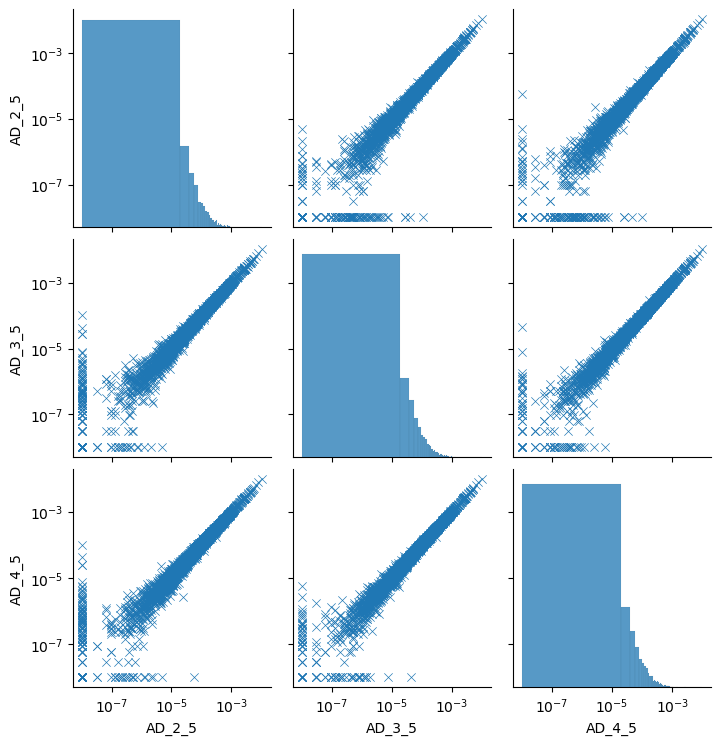

In [41]:
# t5_all_collapsed += 1e-2
p = sns.pairplot(t5_all_collapsed.fillna(1e-8), plot_kws={"marker": "x"})
p.set(xscale="log", yscale="log")

# plt.savefig('t5_pairplot_reproducibility.jpg', format='jpg')

In [48]:
# t5_all_collapsed.to_csv('t5r_norm_nans.csv')

In [96]:
# t5_all_collapsed_spotty = t5_all_collapsed.copy(deep=True)
# t5_all_collapsed_spotty = t5_all_collapsed_spotty[t5_all_collapsed_spotty.isna().any(axis=1)]
# t5_all_collapsed_spotty = t5_all_collapsed_spotty.fillna(0)
# t5_all_collapsed_spotty['2v3'] = abs(t5_all_collapsed_spotty['AD_2_5'] - t5_all_collapsed_spotty['AD_3_5'])
# t5_all_collapsed_spotty['3v4'] = abs(t5_all_collapsed_spotty['AD_3_5'] - t5_all_collapsed_spotty['AD_4_5'])
# t5_all_collapsed_spotty['4v2'] = abs(t5_all_collapsed_spotty['AD_4_5'] - t5_all_collapsed_spotty['AD_2_5'])
# t5_all_collapsed_spotty

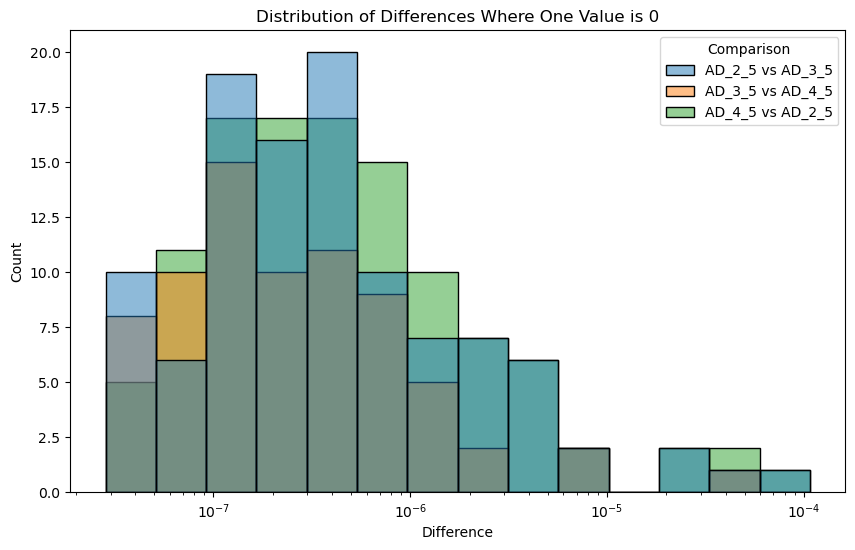

In [113]:
# define library pairs:
library_pairs = [('AD_2_5', 'AD_3_5'), ('AD_3_5', 'AD_4_5'), ('AD_4_5', 'AD_2_5')]

# Create DataFrames for each pairwise library combination
t5_pairdfs = []
for lib1, lib2 in library_pairs:
    df = t5_all_collapsed[[lib1, lib2]]
    df = df[df[lib1].isna() | df[lib2].isna()]
    df = df.fillna(0)
    df['Difference'] = abs(df[lib1] - df[lib2])
    df['Comparison'] = f'{lib1} vs {lib2}'  # Label for each comparison
    t5_pairdfs.append(df)

t5_combined_df = pd.concat(t5_pairdfs, ignore_index=True)

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=t5_combined_df, x='Difference', hue='Comparison', log_scale=True)

# Set title and labels
plt.title('Distribution of Differences Where One Value is 0')
plt.xlabel('Difference')
plt.ylabel('Count')

# Show the plot
plt.show()

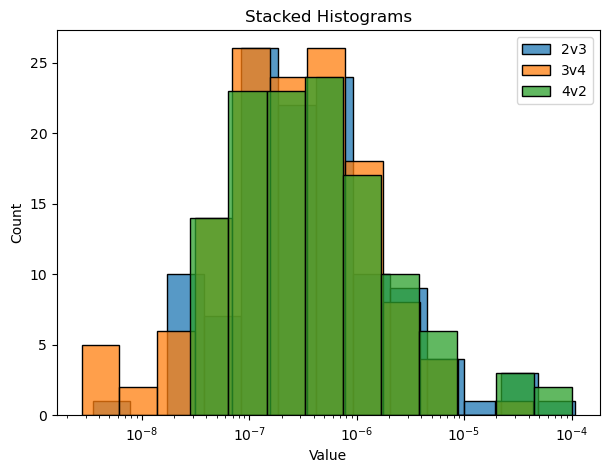

In [93]:
# # Create a figure with just 1 subplot
# fig, ax = plt.subplots(figsize=(7, 5))

# # Plot all histograms on the same subplot
# sns.histplot(x=t5_all_collapsed_spotty['2v3'], log_scale=True, ax=ax, label='2v3')
# sns.histplot(x=t5_all_collapsed_spotty['3v4'], log_scale=True, ax=ax, label='3v4')
# sns.histplot(x=t5_all_collapsed_spotty['4v2'], log_scale=True, ax=ax, label='4v2')

# # Add a legend to differentiate the histograms
# ax.legend()

# # Set title and labels if desired
# ax.set_title('Stacked Histograms')
# ax.set_xlabel('Value')
# ax.set_ylabel('Count')

# # Show the plot
# plt.show()

In [80]:
t10_all.describe()

BCs        Tile-AD    Allreads_y  R_normalized  A_normalized  \
count    9664.000000    9664.000000  9.664000e+03  9.664000e+03  9.664000e+03   
mean     6963.030422    5340.412148  3.118256e+07  2.008577e-04  1.712657e-04   
std     21438.159168    8656.749830  9.885067e+05  6.175720e-04  2.774811e-04   
min         1.000000       1.000000  2.979576e+07  2.805203e-08  3.122353e-08   
25%       386.000000     576.000000  2.979576e+07  1.126459e-05  1.837627e-05   
50%      1466.000000    2272.000000  3.172569e+07  4.212547e-05  7.291700e-05   
75%      4849.000000    6439.250000  3.202713e+07  1.396856e-04  2.063535e-04   
max    478213.000000  151244.000000  3.202713e+07  1.343476e-02  4.846159e-03   

             Ratio  
count  9664.000000  
mean      6.284923  
std      86.686357  
min       0.000071  
25%       0.312867  
50%       0.501005  
75%       1.311450  
max    3544.873764

In [49]:
#get rptr normalized, pivot on rptr bc
t10_all_collapsed = t10_all.pivot_table(index='index_x', columns='Library', values='R_normalized').reset_index()
t10_all_collapsed = pd.merge(t10_all_collapsed, t10_all[['index_x', 'Tile']].drop_duplicates(), on='index_x')
print(t10_all_collapsed.shape)
t10_all_collapsed[t10_all_collapsed.isna().any(axis=1)]

(3280, 5)


index_x       AD_2_10       AD_3_10       AD_4_10  \
35    AAATGAAATGAGCA           NaN           NaN  7.635387e-07   
51    AACAGCCCGCGATA           NaN  4.775926e-07  3.054155e-08   
59    AACCTCCCCAGTGA           NaN  7.023420e-07  4.581232e-07   
80    AACTGCTCAACATA           NaN  2.247494e-07           NaN   
83    AACTTCGCCGTATA  5.890925e-07           NaN  8.857049e-07   
...              ...           ...           ...           ...   
3167  TTGACACTCACAAG  1.963642e-07           NaN           NaN   
3212  TTGGGGGTGGAAAA           NaN  5.618736e-07           NaN   
3227  TTGTGTATGCTGGT  5.666509e-06  6.180610e-06           NaN   
3245  TTTCCGCAGCGTCA  2.805203e-08           NaN           NaN   
3275  TTTTGCATCAGATT           NaN           NaN  9.162465e-08   

                                                   Tile  
35    ATTGATTCTCCATTGTATATTGCTGATTCTACTGATACTTCTCCAT...  
51    TATCAACAAGCATTTCAGAATGGTTTGTTCTTGAATCCATCTCCAG...  
59    CCATTTATGTCTGCTCCAAATTCTACTGCTTTGACTGCTTTGACTT...  
80    TGGTATTCTTTGTTTCCACCAACTACTACTTCTTCTGAAGATTCTC...  
83    TATAATAGGAAACATAGATCTGCTCCATTGAATCCAATTGTTCCAG...  
...                                                 ...  
3167  GGTATTGGTCATACTCATGCATTTGATATGTCTCCATGGGAAGCTC...  
3212  GTTACTCATAGAAGAGGTCATAATTGTTGGCAAGGTAGAGCTTCTG...  
3227  GATACTATTGATCCACAAAGATCTTCTTCTCCACCAGTTAATCCAT...  
3245  TCTTCTGCTCCATCTTCTTCTACTGCTTTGAATAAACAGAATAGAC...  
3275  ATGAAGACATTTGATCCAGAAGTTGCATTTGAAGAATGGTTCTTGT...  

[121 rows x 5 columns]

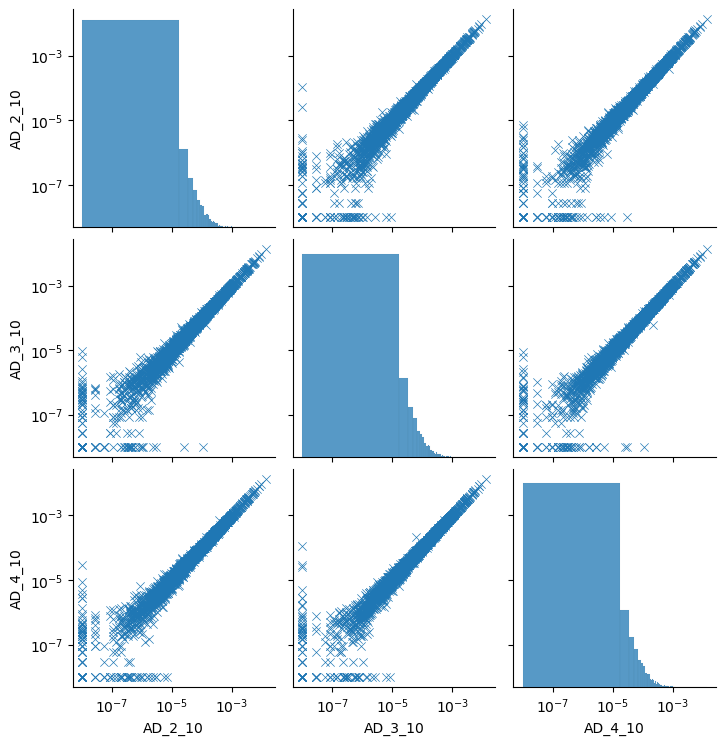

In [82]:
p = sns.pairplot(t10_all_collapsed.fillna(1e-8), plot_kws={"marker": "x"})
p.set(xscale="log", yscale="log")
plt.show()

In [50]:
# t10_all_collapsed.to_csv('t10r_norm_nans.csv')

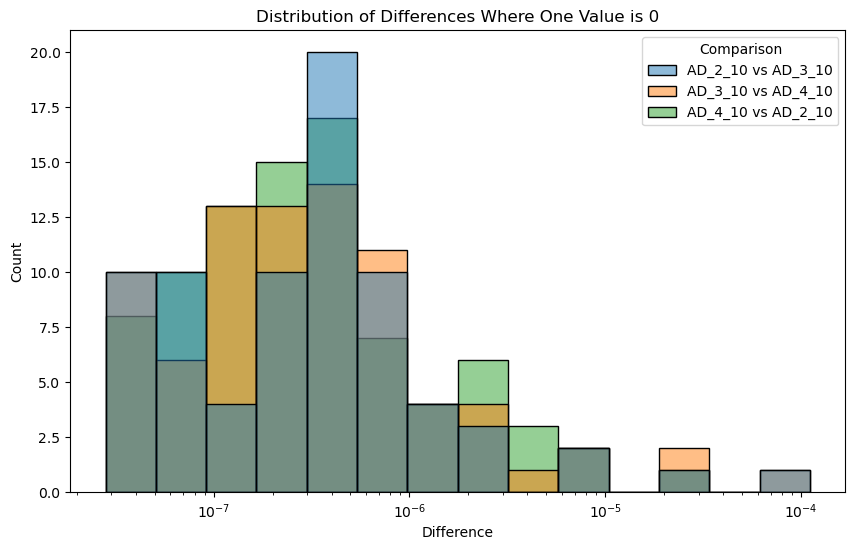

In [112]:
# define library pairs:
library_pairs = [('AD_2_10', 'AD_3_10'), ('AD_3_10', 'AD_4_10'), ('AD_4_10', 'AD_2_10')]

# Create DataFrames for each pairwise library combination
t10_pairdfs = []
for lib1, lib2 in library_pairs:
    df = t10_all_collapsed[[lib1, lib2]]
    df = df[df[lib1].isna() | df[lib2].isna()]
    df = df.fillna(0)
    df['Difference'] = abs(df[lib1] - df[lib2])
    df['Comparison'] = f'{lib1} vs {lib2}'  # Label for each comparison
    t10_pairdfs.append(df)

t10_combined_df = pd.concat(t10_pairdfs, ignore_index=True)

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=t10_combined_df, x='Difference', hue='Comparison', log_scale=True)

# Set title and labels
plt.title('Distribution of Differences Where One Value is 0')
plt.xlabel('Difference')
plt.ylabel('Count')

# Show the plot
plt.show()

In [120]:
t15_all.describe()

BCs        Tile-AD    Allreads_y  R_normalized  A_normalized  \
count    6489.000000    6489.000000  6.489000e+03  6.489000e+03  6.489000e+03   
mean     6483.971490    5678.139621  3.316144e+07  2.023504e-04  1.712344e-04   
std     21065.472403    9241.009914  2.669279e+05  6.532974e-04  2.786957e-04   
min         1.000000       1.000000  3.289515e+07  2.842661e-08  2.991418e-08   
25%       310.000000     595.000000  3.289515e+07  9.828603e-06  1.782885e-05   
50%      1219.000000    2413.000000  3.289515e+07  3.824157e-05  7.281111e-05   
75%      4132.000000    6847.000000  3.342897e+07  1.287755e-04  2.054805e-04   
max    489775.000000  158262.000000  3.342897e+07  1.392264e-02  4.811104e-03   

              Ratio  
count   6489.000000  
mean       8.885569  
std      185.187504  
min        0.000072  
25%        0.276113  
50%        0.443712  
75%        1.297701  
max    10130.986385

(3278, 4)
(75, 4)


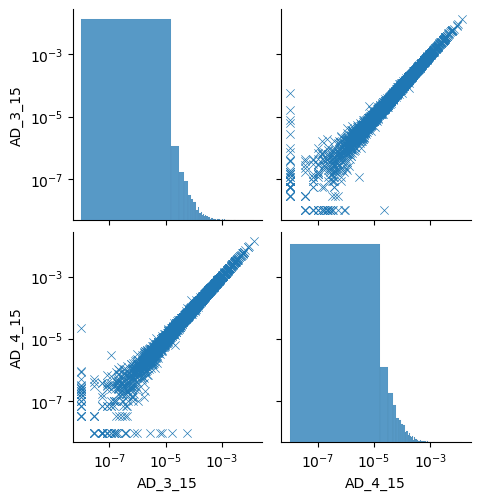

In [51]:
#get rptr normalized, pivot on rptr bc
t15_all_collapsed = t15_all.pivot_table(index='index_x', columns='Library', values='R_normalized').reset_index()
t15_all_collapsed = pd.merge(t15_all_collapsed, t15_all[['index_x', 'Tile']].drop_duplicates(), on='index_x', how='left')
print(t15_all_collapsed.shape)
print(t15_all_collapsed[t15_all_collapsed.isna().any(axis=1)].shape)

p = sns.pairplot(t15_all_collapsed.fillna(1e-8), plot_kws={"marker": "x"})
p.set(xscale="log", yscale="log")
plt.show()
# t15_all_collapsed.to_csv('t15r_norm_nans.csv')

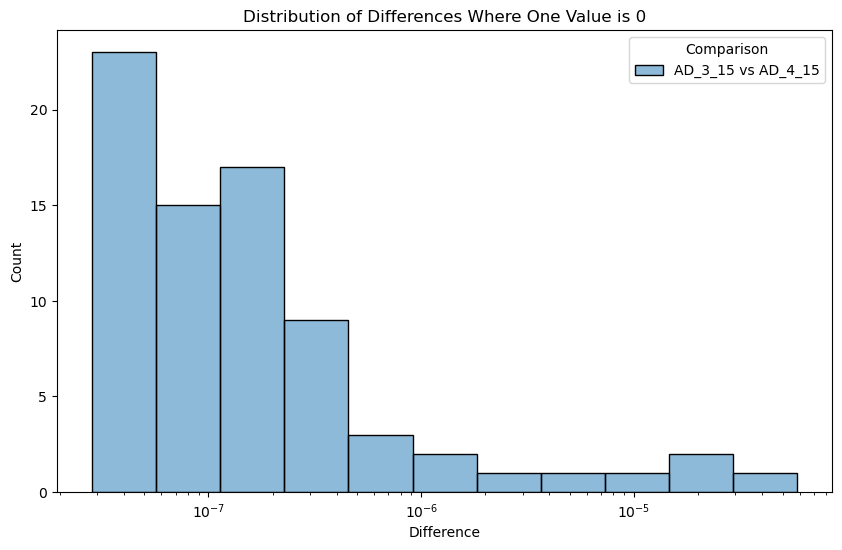

In [116]:
# define library pairs:
library_pairs = [ ('AD_3_15', 'AD_4_15')]

# Create DataFrames for each pairwise library combination
t15_pairdfs = []
for lib1, lib2 in library_pairs:
    df = t15_all_collapsed[[lib1, lib2]]
    df = df[df[lib1].isna() | df[lib2].isna()]
    df = df.fillna(0)
    df['Difference'] = abs(df[lib1] - df[lib2])
    df['Comparison'] = f'{lib1} vs {lib2}'  # Label for each comparison
    t15_pairdfs.append(df)

t15_combined_df = pd.concat(t15_pairdfs, ignore_index=True)

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=t15_combined_df, x='Difference', hue='Comparison', log_scale=True)

# Set title and labels
plt.title('Distribution of Differences Where One Value is 0')
plt.xlabel('Difference')
plt.ylabel('Count')

# Show the plot
plt.show()

In [121]:
t30_all.describe()

BCs        Tile-AD    Allreads_y  R_normalized  A_normalized  \
count    6472.000000    6472.000000  6.472000e+03  6.472000e+03  6.472000e+03   
mean     5653.388597    6463.056242  3.809585e+07  2.032160e-04  1.696577e-04   
std     17390.043631   10540.708588  2.765254e+05  6.248366e-04  2.767158e-04   
min         1.000000       1.000000  3.782062e+07  3.411398e-08  2.605956e-08   
25%       252.750000     672.750000  3.782062e+07  9.111231e-06  1.761455e-05   
50%      1007.000000    2735.500000  3.782062e+07  3.661951e-05  7.179015e-05   
75%      3616.000000    7704.000000  3.837364e+07  1.290487e-04  2.021896e-04   
max    323944.000000  185603.000000  3.837364e+07  1.138219e-02  4.907455e-03   

              Ratio  
count   6472.000000  
mean       8.409523  
std      197.715049  
min        0.000079  
25%        0.257062  
50%        0.435011  
75%        1.380796  
max    14256.841404

(3280, 4)
(92, 4)


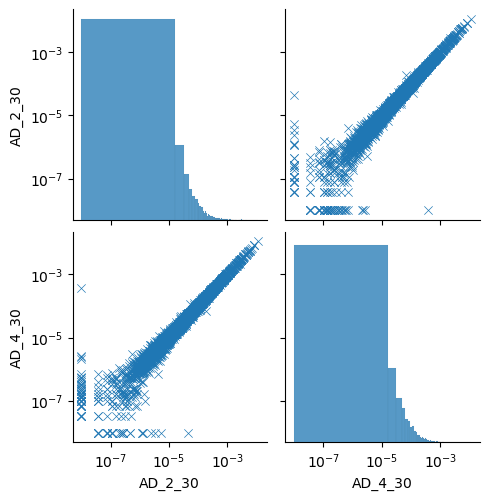

In [52]:
#get rptr normalized, pivot on rptr bc
t30_all_collapsed = t30_all.pivot_table(index='index_x', columns='Library', values='R_normalized').reset_index()
t30_all_collapsed = pd.merge(t30_all_collapsed, t30_all[['index_x', 'Tile']].drop_duplicates(), on='index_x')
print(t30_all_collapsed.shape)
print(t30_all_collapsed[t30_all_collapsed.isna().any(axis=1)].shape)

p = sns.pairplot(t30_all_collapsed.fillna(1e-8), plot_kws={"marker": "x"})
p.set(xscale="log", yscale="log")
plt.show()
t30_all_collapsed.to_csv('t30r_norm_nans.csv')

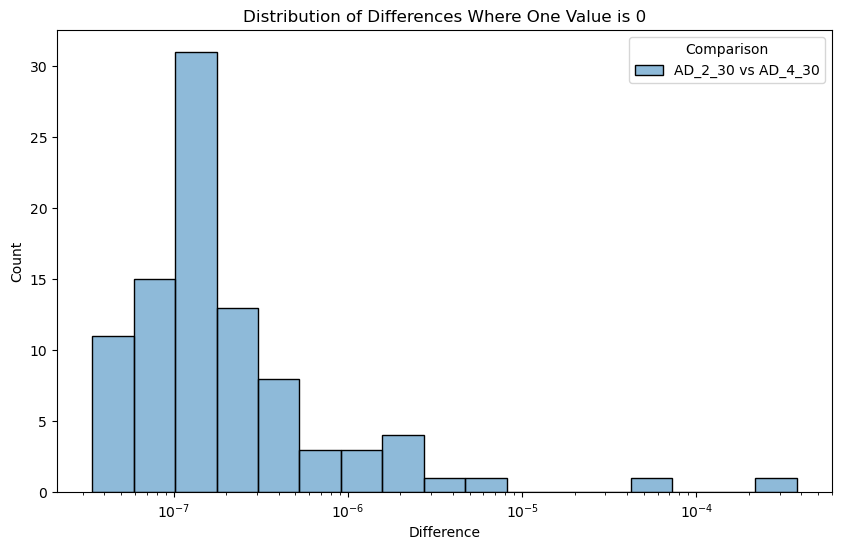

In [125]:
# define library pairs:
library_pairs = [ ('AD_2_30', 'AD_4_30')]

# Create DataFrames for each pairwise library combination
t30_pairdfs = []
for lib1, lib2 in library_pairs:
    df = t30_all_collapsed[[lib1, lib2]]
    df = df[df[lib1].isna() | df[lib2].isna()]
    df = df.fillna(0)
    df['Difference'] = abs(df[lib1] - df[lib2])
    df['Comparison'] = f'{lib1} vs {lib2}'  # Label for each comparison
    t30_pairdfs.append(df)

t30_combined_df = pd.concat(t30_pairdfs, ignore_index=True)

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=t30_combined_df, x='Difference', hue='Comparison', log_scale=True)

# Set title and labels
plt.title('Distribution of Differences Where One Value is 0')
plt.xlabel('Difference')
plt.ylabel('Count')

# Show the plot
plt.show()

(3319, 5)
(124, 5)


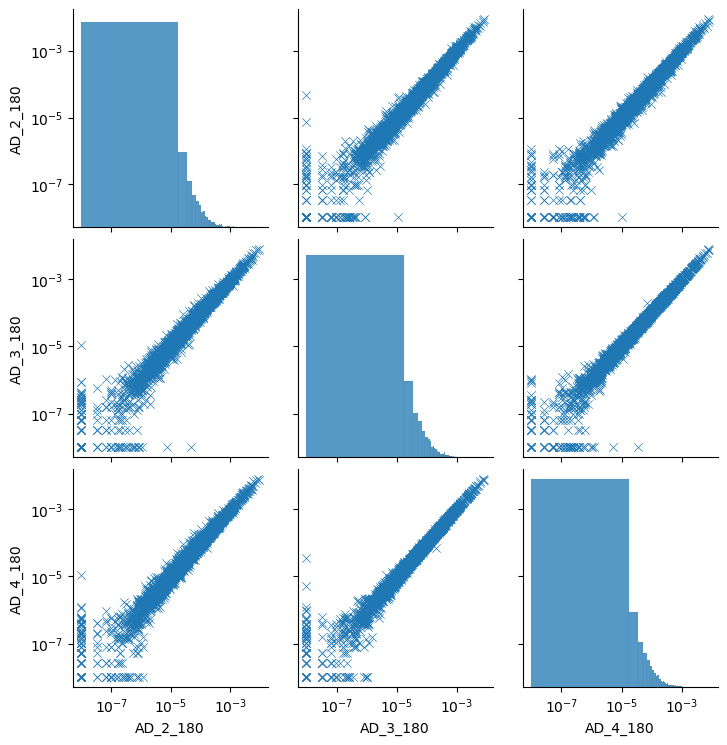

In [53]:
#get rptr normalized, pivot on rptr bc
t180_all_collapsed = t180_all.pivot_table(index='index_x', columns='Library', values='R_normalized').reset_index()
t180_all_collapsed = pd.merge(t180_all_collapsed, t180_all[['index_x', 'Tile']].drop_duplicates(), on='index_x')
print(t180_all_collapsed.shape)
print(t180_all_collapsed[t180_all_collapsed.isna().any(axis=1)].shape)

p = sns.pairplot(t180_all_collapsed.fillna(1e-8), plot_kws={"marker": "x"})
p.set(xscale="log", yscale="log")
plt.show()
t180_all_collapsed.to_csv('t180r_norm_nans.csv')

In [37]:
print(t180_all_collapsed.head())

          index_x  AD_2_180  AD_3_180  AD_4_180  \
0  AAACAAATAGATGA  0.000253  0.000197  0.000186   
1  AAACCAAGTCGTAT       NaN  0.000037  0.000033   
2  AAACGGTTCACCGC  0.000157  0.000185  0.000171   
3  AAAGAAACTCAGAT  0.000005  0.000007  0.000004   
4  AAAGAAGGCCCTGC  0.000686  0.000618  0.000673   

                                                Tile  
0  GGTACTTATATTCATCATGAAATTTCTGGTTGTGATTCTCATAAAG...  
1  GCTTTGTCTGGTGATCCATGGTATCCATTGTTTCCACAAGAAGATC...  
2  TCTTTGCCAGAAGACTTTGTCTTGTTTCCAGCTGCTCCATGTCCAC...  
3  ACTGCTAATATTCCACCACAAGACTTTCCAGTCTTTACTACTGATC...  
4  TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...  


<Axes: >

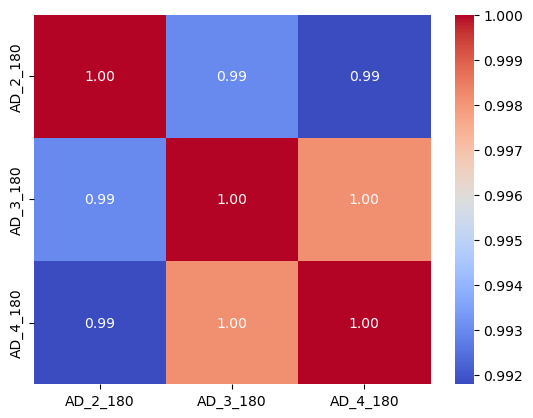

In [31]:
# Calculate the correlation matrix
t180_corr_matrix = t180_all_collapsed.corr(numeric_only=True)

# Create a heatmap
sns.heatmap(t180_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

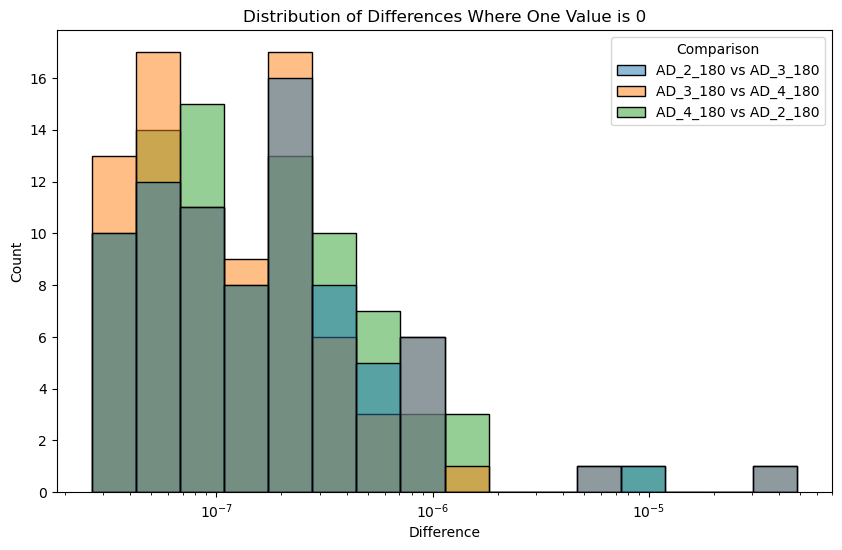

In [128]:
# define library pairs:
library_pairs = [('AD_2_180', 'AD_3_180'), ('AD_3_180', 'AD_4_180'), ('AD_4_180', 'AD_2_180')]

# Create DataFrames for each pairwise library combination
t180_pairdfs = []
for lib1, lib2 in library_pairs:
    df = t180_all_collapsed[[lib1, lib2]]
    df = df[df[lib1].isna() | df[lib2].isna()]
    df = df.fillna(0)
    df['Difference'] = abs(df[lib1] - df[lib2])
    df['Comparison'] = f'{lib1} vs {lib2}'  # Label for each comparison
    t180_pairdfs.append(df)

t180_combined_df = pd.concat(t180_pairdfs, ignore_index=True)

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=t180_combined_df, x='Difference', hue='Comparison', log_scale=True)

# Set title and labels
plt.title('Distribution of Differences Where One Value is 0')
plt.xlabel('Difference')
plt.ylabel('Count')

# Show the plot
plt.show()

(3309, 4)
(96, 4)


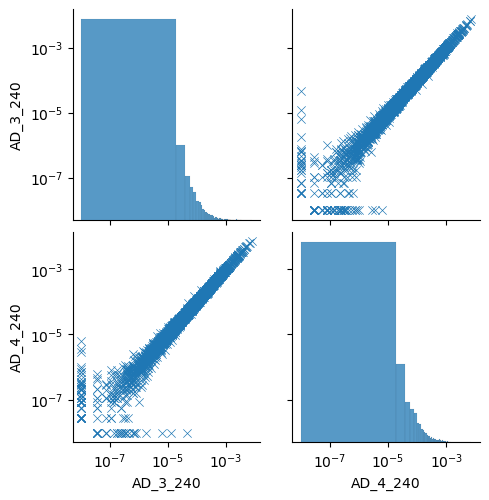

In [54]:
#get rptr normalized, pivot on rptr bc
t240_all_collapsed = t240_all.pivot_table(index='index_x', columns='Library', values='R_normalized').reset_index()
t240_all_collapsed = pd.merge(t240_all_collapsed, t240_all[['index_x', 'Tile']].drop_duplicates(), on='index_x')
print(t240_all_collapsed.shape)
print(t240_all_collapsed[t240_all_collapsed.isna().any(axis=1)].shape)

p = sns.pairplot(t240_all_collapsed.fillna(1e-8), plot_kws={"marker": "x"})
p.set(xscale="log", yscale="log")
plt.show()
t240_all_collapsed.to_csv('t240r_norm_nans.csv')

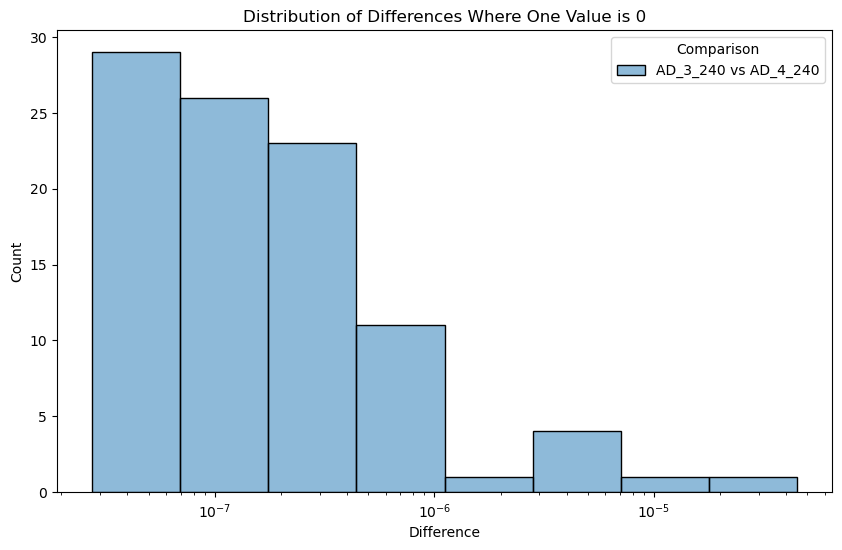

In [130]:
# define library pairs:
library_pairs = [ ('AD_3_240', 'AD_4_240')]

# Create DataFrames for each pairwise library combination
t240_pairdfs = []
for lib1, lib2 in library_pairs:
    df = t240_all_collapsed[[lib1, lib2]]
    df = df[df[lib1].isna() | df[lib2].isna()]
    df = df.fillna(0)
    df['Difference'] = abs(df[lib1] - df[lib2])
    df['Comparison'] = f'{lib1} vs {lib2}'  # Label for each comparison
    t240_pairdfs.append(df)

t240_combined_df = pd.concat(t240_pairdfs, ignore_index=True)

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=t240_combined_df, x='Difference', hue='Comparison', log_scale=True)

# Set title and labels
plt.title('Distribution of Differences Where One Value is 0')
plt.xlabel('Difference')
plt.ylabel('Count')

# Show the plot
plt.show()

In [26]:
# across a time series how many BC's do we lose?
# sample 4 has all time points

s4_timeseries = []

for key in merged_dfs.keys():
    if key.startswith('AD_4'):
        print(key)
        merged_dfs[key]['Library'] = key
        s4_timeseries.append(merged_dfs[key])
    
s4_all = pd.concat(s4_timeseries, ignore_index=True)
s4_all['R_norm_rpm'] = s4_all['R_normalized']*10e6 # reads per million
s4_all['A_norm_rpm'] = s4_all['A_normalized']*10e6 # reads per million

s4_all.tail()

AD_4_15
AD_4_0
AD_4_10
AD_4_180
AD_4_30
AD_4_5
AD_4_240


index_x  BCs                                   PutativeTileADBC  \
22712  CTATAACTTCTTAG    1  ['GCTGCTAGGAAATCTAGACAAAGGAAGATGCAAAGATTTGATGA...   
22713  CCTCGTCCAACCAA    1  ['GATACATTTGATTGGGAAACTTGGTCTGGTGCTCAATTTACTAC...   
22714  CTACGGCGACTTCG    1  ['CCAGCTACTATTCCAACTCCAACTCCATCTATTCCAACTACTAC...   
22715  CGGGTGCCTGCTCC    1  ['ATGGATTTGCAAGATGCTATGTCTTCTTTGGAAGGATTTACTGC...   
22716  TCTAAGATACAATA    1  ['ACATTTATTGGTCATAGATTCTTTAAGACTGATGATTTGTCTCC...   

       Tile-AD Library_y  Allreads_y  R_normalized  A_normalized     Ratio  \
22712       49  AD_4_240    35129689  2.765114e-08      0.000001  0.019824   
22713     3993  AD_4_240    35129689  2.765114e-08      0.000114  0.000243   
22714      648  AD_4_240    35129689  2.765114e-08      0.000018  0.001499   
22715      312  AD_4_240    35129689  2.765114e-08      0.000009  0.003113   
22716      483  AD_4_240    35129689  2.765114e-08      0.000014  0.002011   

                                                    Tile           AD  \
22712  GCTGCTAGGAAATCTAGACAAAGGAAGATGCAAAGATTTGATGAAT...  TTGAAAGGTCA   
22713  GATACATTTGATTGGGAAACTTGGTCTGGTGCTCAATTTACTACTA...  CGCGAATGCAG   
22714  CCAGCTACTATTCCAACTCCAACTCCATCTATTCCAACTACTACTC...  CCCTACACTCC   
22715  ATGGATTTGCAAGATGCTATGTCTTCTTTGGAAGGATTTACTGCAT...  CCGCCACCTCA   
22716  ACATTTATTGGTCATAGATTCTTTAAGACTGATGATTTGTCTCCAT...  ATATGGAACAA   

        Library  R_norm_rpm   A_norm_rpm  
22712  AD_4_240    0.276511    13.948316  
22713  AD_4_240    0.276511  1136.645417  
22714  AD_4_240    0.276511   184.459361  
22715  AD_4_240    0.276511    88.813767  
22716  AD_4_240    0.276511   137.490543

In [47]:
s4_all.describe()

BCs        Tile-AD    Allreads_y  R_normalized  A_normalized  \
count   22717.000000   22717.000000  2.271700e+04  2.271700e+04  2.271700e+04   
mean     6507.012502    5995.058238  3.502362e+07  1.926635e-04  1.712352e-04   
std     17893.688285    9884.745180  4.186269e+06  5.405919e-04  2.792460e-04   
min         1.000000       1.000000  3.010548e+07  2.670798e-08  2.294153e-08   
25%       377.000000     620.000000  3.172569e+07  1.126023e-05  1.787050e-05   
50%      1505.000000    2515.000000  3.342897e+07  4.486554e-05  7.275897e-05   
75%      5095.000000    7173.000000  3.782062e+07  1.496366e-04  2.056104e-04   
max    430876.000000  215668.000000  4.358907e+07  1.355769e-02  4.947754e-03   

              Ratio     R_norm_rpm    A_norm_rpm  
count  22717.000000   22717.000000  22717.000000  
mean       6.618232    1926.634567   1712.351698  
std      137.985969    5405.918778   2792.459816  
min        0.000073       0.267080      0.229415  
25%        0.324753     112.602312    178.705001  
50%        0.599556     448.655364    727.589703  
75%        1.332381    1496.365902   2056.104003  
max    14256.841404  135576.921846  49477.537639

In [16]:
# # Function to annotate with Pearson correlation
# def corrfunc(x, y, **kws):
#     r = np.corrcoef(x, y)[0, 1]
#     ax = plt.gca()
#     ax.annotate(f'Pearson r = {r:.2f}', xy=(0.5, 0.1), xycoords=ax.transAxes, ha='center', fontsize=12)

(3359, 9)
(227, 9)


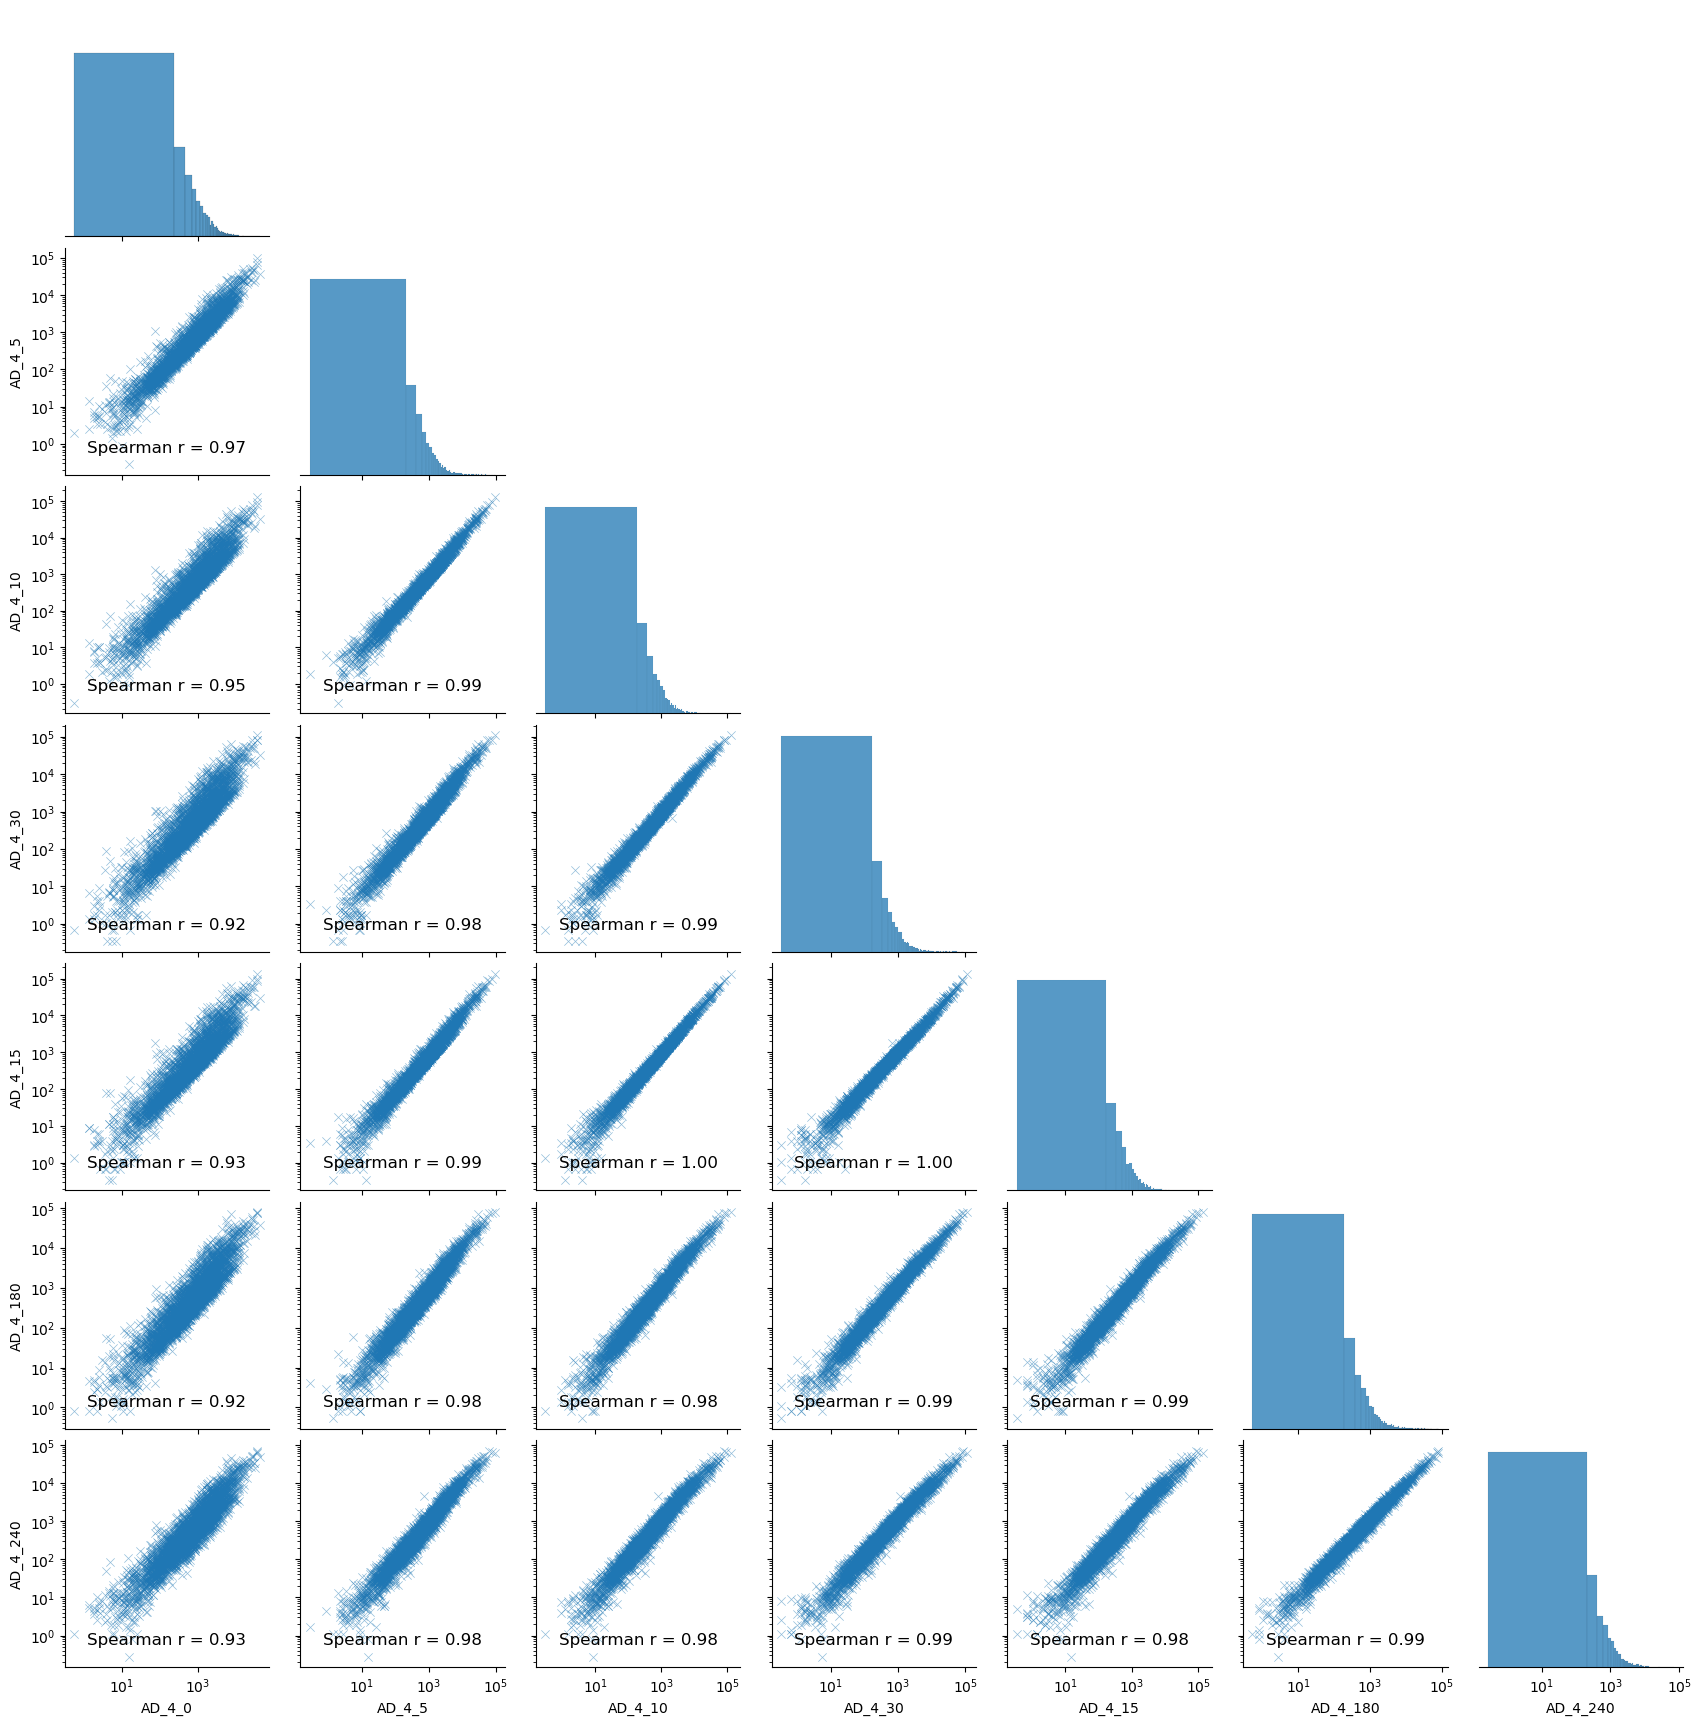

In [28]:
#get rptr normalized, pivot on rptr bc
s4_all_collapsed = s4_all.pivot_table(index='index_x', columns='Library', values='R_norm_rpm').reset_index()
s4_all_collapsed = pd.merge(s4_all_collapsed, s4_all[['index_x', 'Tile']].drop_duplicates(), on='index_x', how='left')
print(s4_all_collapsed.shape)
print(s4_all_collapsed[s4_all_collapsed.isna().any(axis=1)].shape)

# Specify the columns in the order you want
ordered_columns = ['AD_4_0', 'AD_4_5', 'AD_4_10', 'AD_4_30', 'AD_4_15', 'AD_4_180', 'AD_4_240']
# p = sns.pairplot(s4_all_collapsed.fillna(1e-2), vars=ordered_columns, plot_kws={"marker": "x", "alpha": 0.5}, corner=True, )
p = sns.pairplot(s4_all_collapsed.dropna(), vars=ordered_columns, plot_kws={"marker": "x", "alpha": 0.5}, corner=True, )
p.set(xscale="log", yscale="log")
# Apply the custom annotation function to the lower triangle of the pairplot
p.map_lower(corrfunc) ##USED FROM BELOW


# p.label(x='For time point X in sample 4: RPTR BC reads per million', title='Normalized RPTR BC counts in reads per million')
plt.show()

In [46]:
s4_all_collapsed.describe()

AD_4_0       AD_4_10       AD_4_15      AD_4_180      AD_4_240  \
count   3203.000000   3224.000000   3234.000000   3274.000000   3276.000000   
mean    1743.243711   1706.640723   1704.314530   1708.355597   1697.614812   
std     2811.586265   2757.679569   2765.203887   2823.118995   2801.147545   
min        0.301015      0.315202      0.299142      0.229415      0.284660   
25%      187.983889    181.241122    178.961563    172.462947    171.507354   
50%      754.644692    727.801304    730.803340    721.855223    723.604470   
75%     2109.663871   2056.377525   2048.148902   2052.177159   2022.719302   
max    48220.200445  46373.456566  47046.025893  49477.537639  47107.448062   

            AD_4_30        AD_4_5  
count   3249.000000   3239.000000  
mean    1704.239260   1727.107632  
std     2790.791672   2803.004890  
min        0.264406      0.332165  
25%      172.657115    188.503881  
50%      721.299555    732.092605  
75%     2018.739775   2068.228041  
max    49074.545965  47222.630324

(3359, 9)
(227, 9)


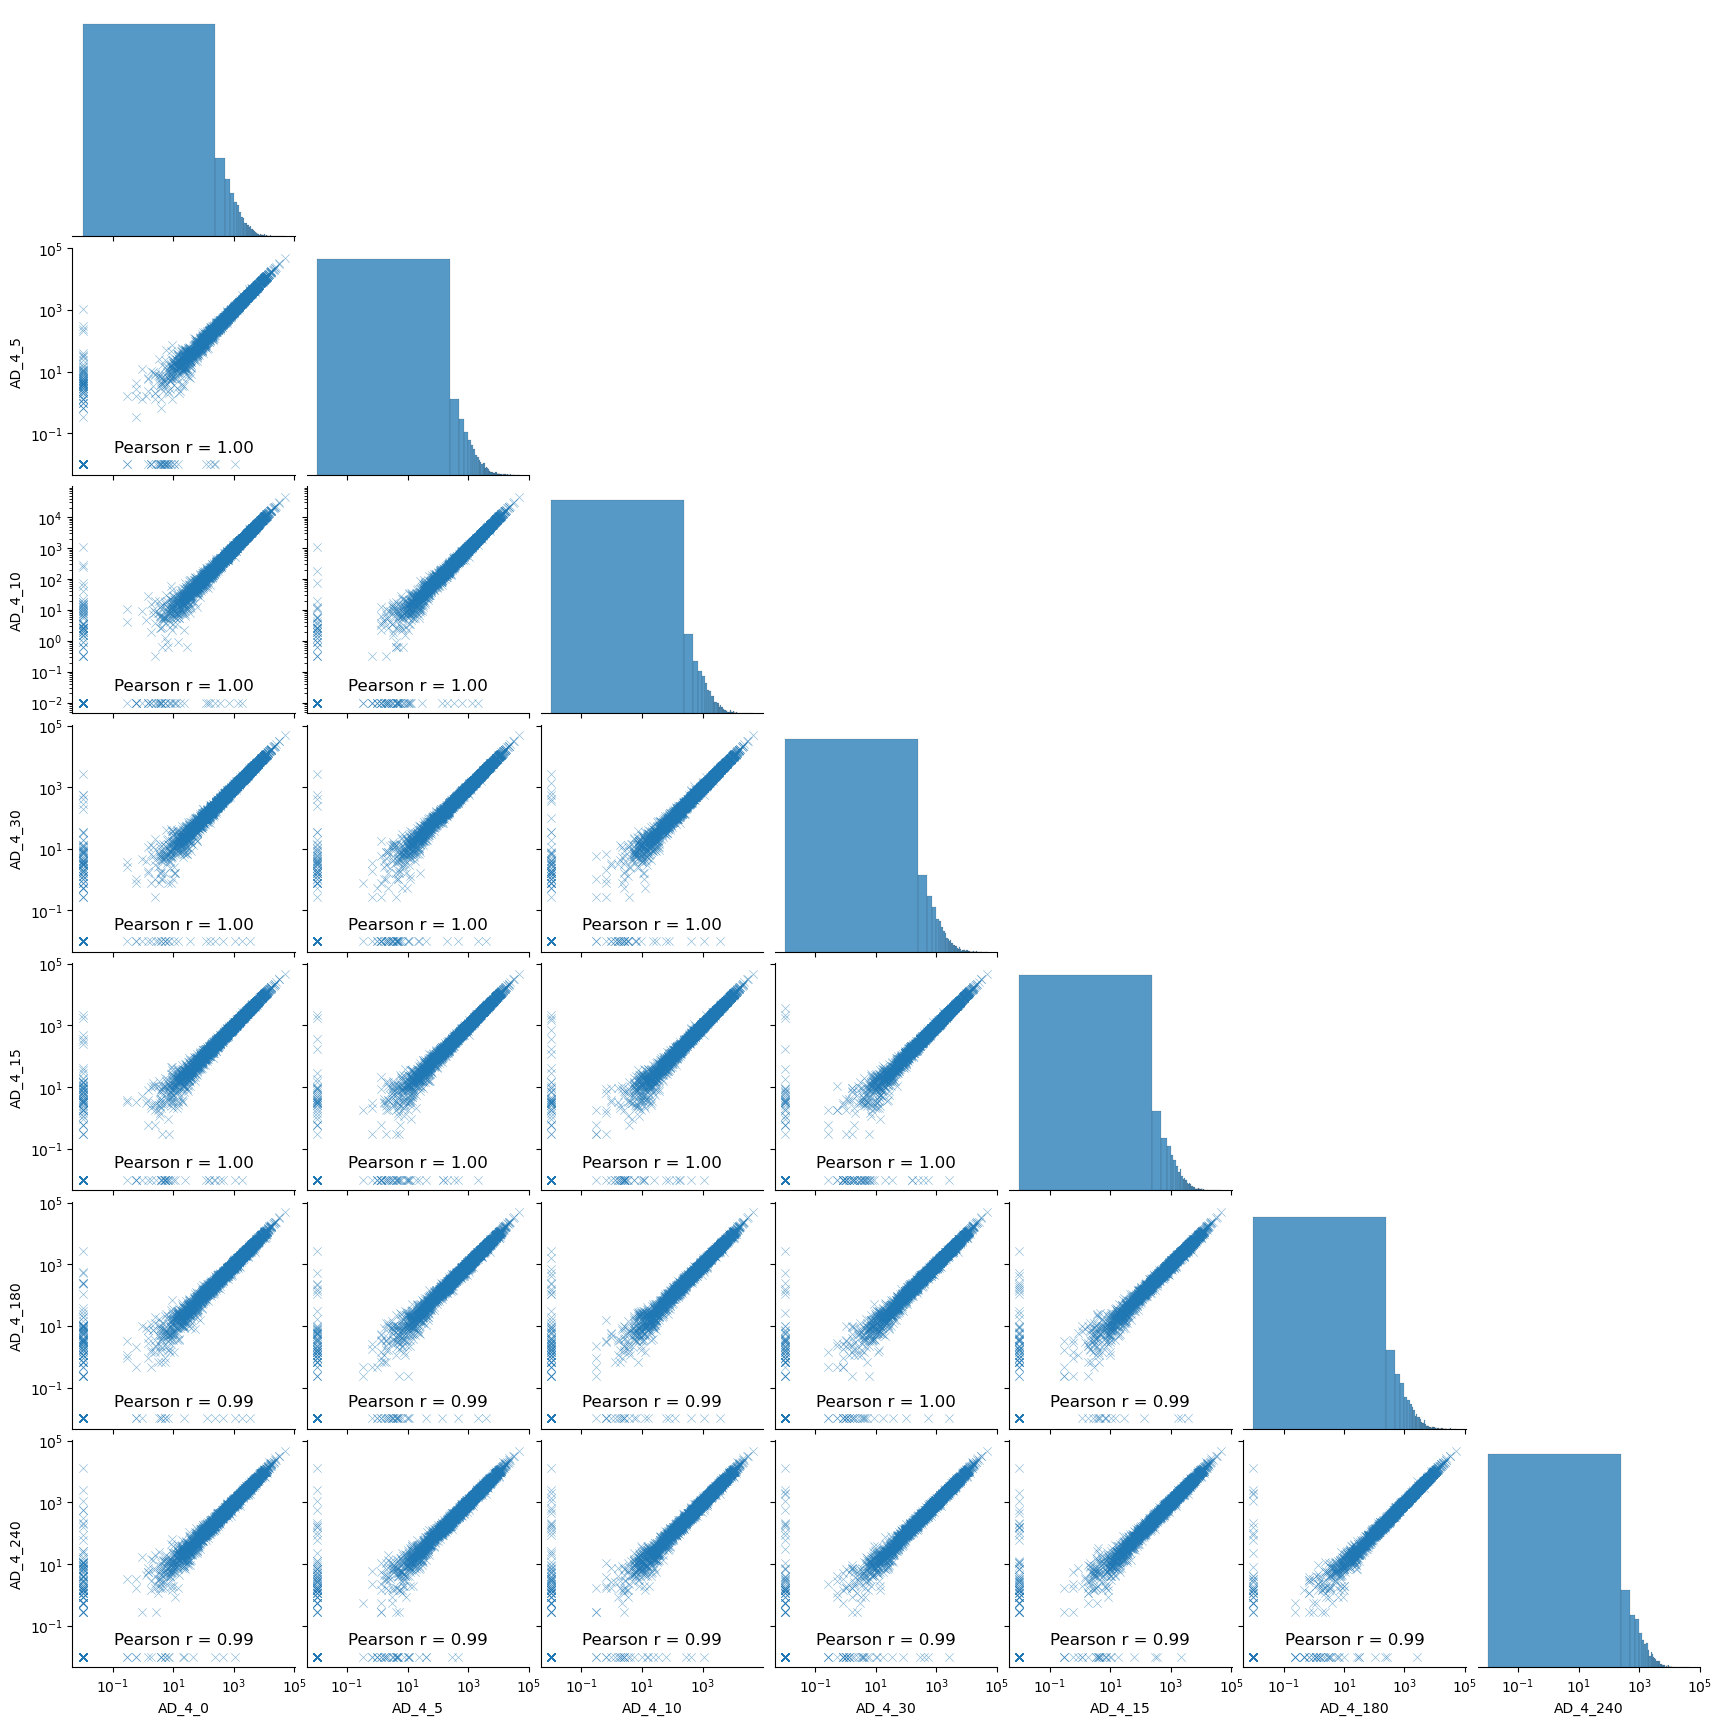

In [45]:
#get ad normalized, pivot on rptr bc
s4_all_collapsed = s4_all.pivot_table(index='index_x', columns='Library', values='A_norm_rpm').reset_index()
s4_all_collapsed = pd.merge(s4_all_collapsed, s4_all[['index_x', 'Tile']].drop_duplicates(), on='index_x', how='left')
print(s4_all_collapsed.shape)
print(s4_all_collapsed[s4_all_collapsed.isna().any(axis=1)].shape)

# Specify the columns in the order you want
ordered_columns = ['AD_4_0', 'AD_4_5', 'AD_4_10', 'AD_4_30', 'AD_4_15', 'AD_4_180', 'AD_4_240']
p = sns.pairplot(s4_all_collapsed.fillna(1e-2), vars=ordered_columns, plot_kws={"marker": "x", "alpha": 0.5}, corner=True, )
p.set(xscale="log", yscale="log")
# Apply the custom annotation function to the lower triangle of the pairplot
p.map_lower(corrfunc)


# p.label(x='For time point X in sample 4: RPTR BC reads per million', title='Normalized RPTR BC counts in reads per million')
plt.show()

(3359, 9)
(227, 9)


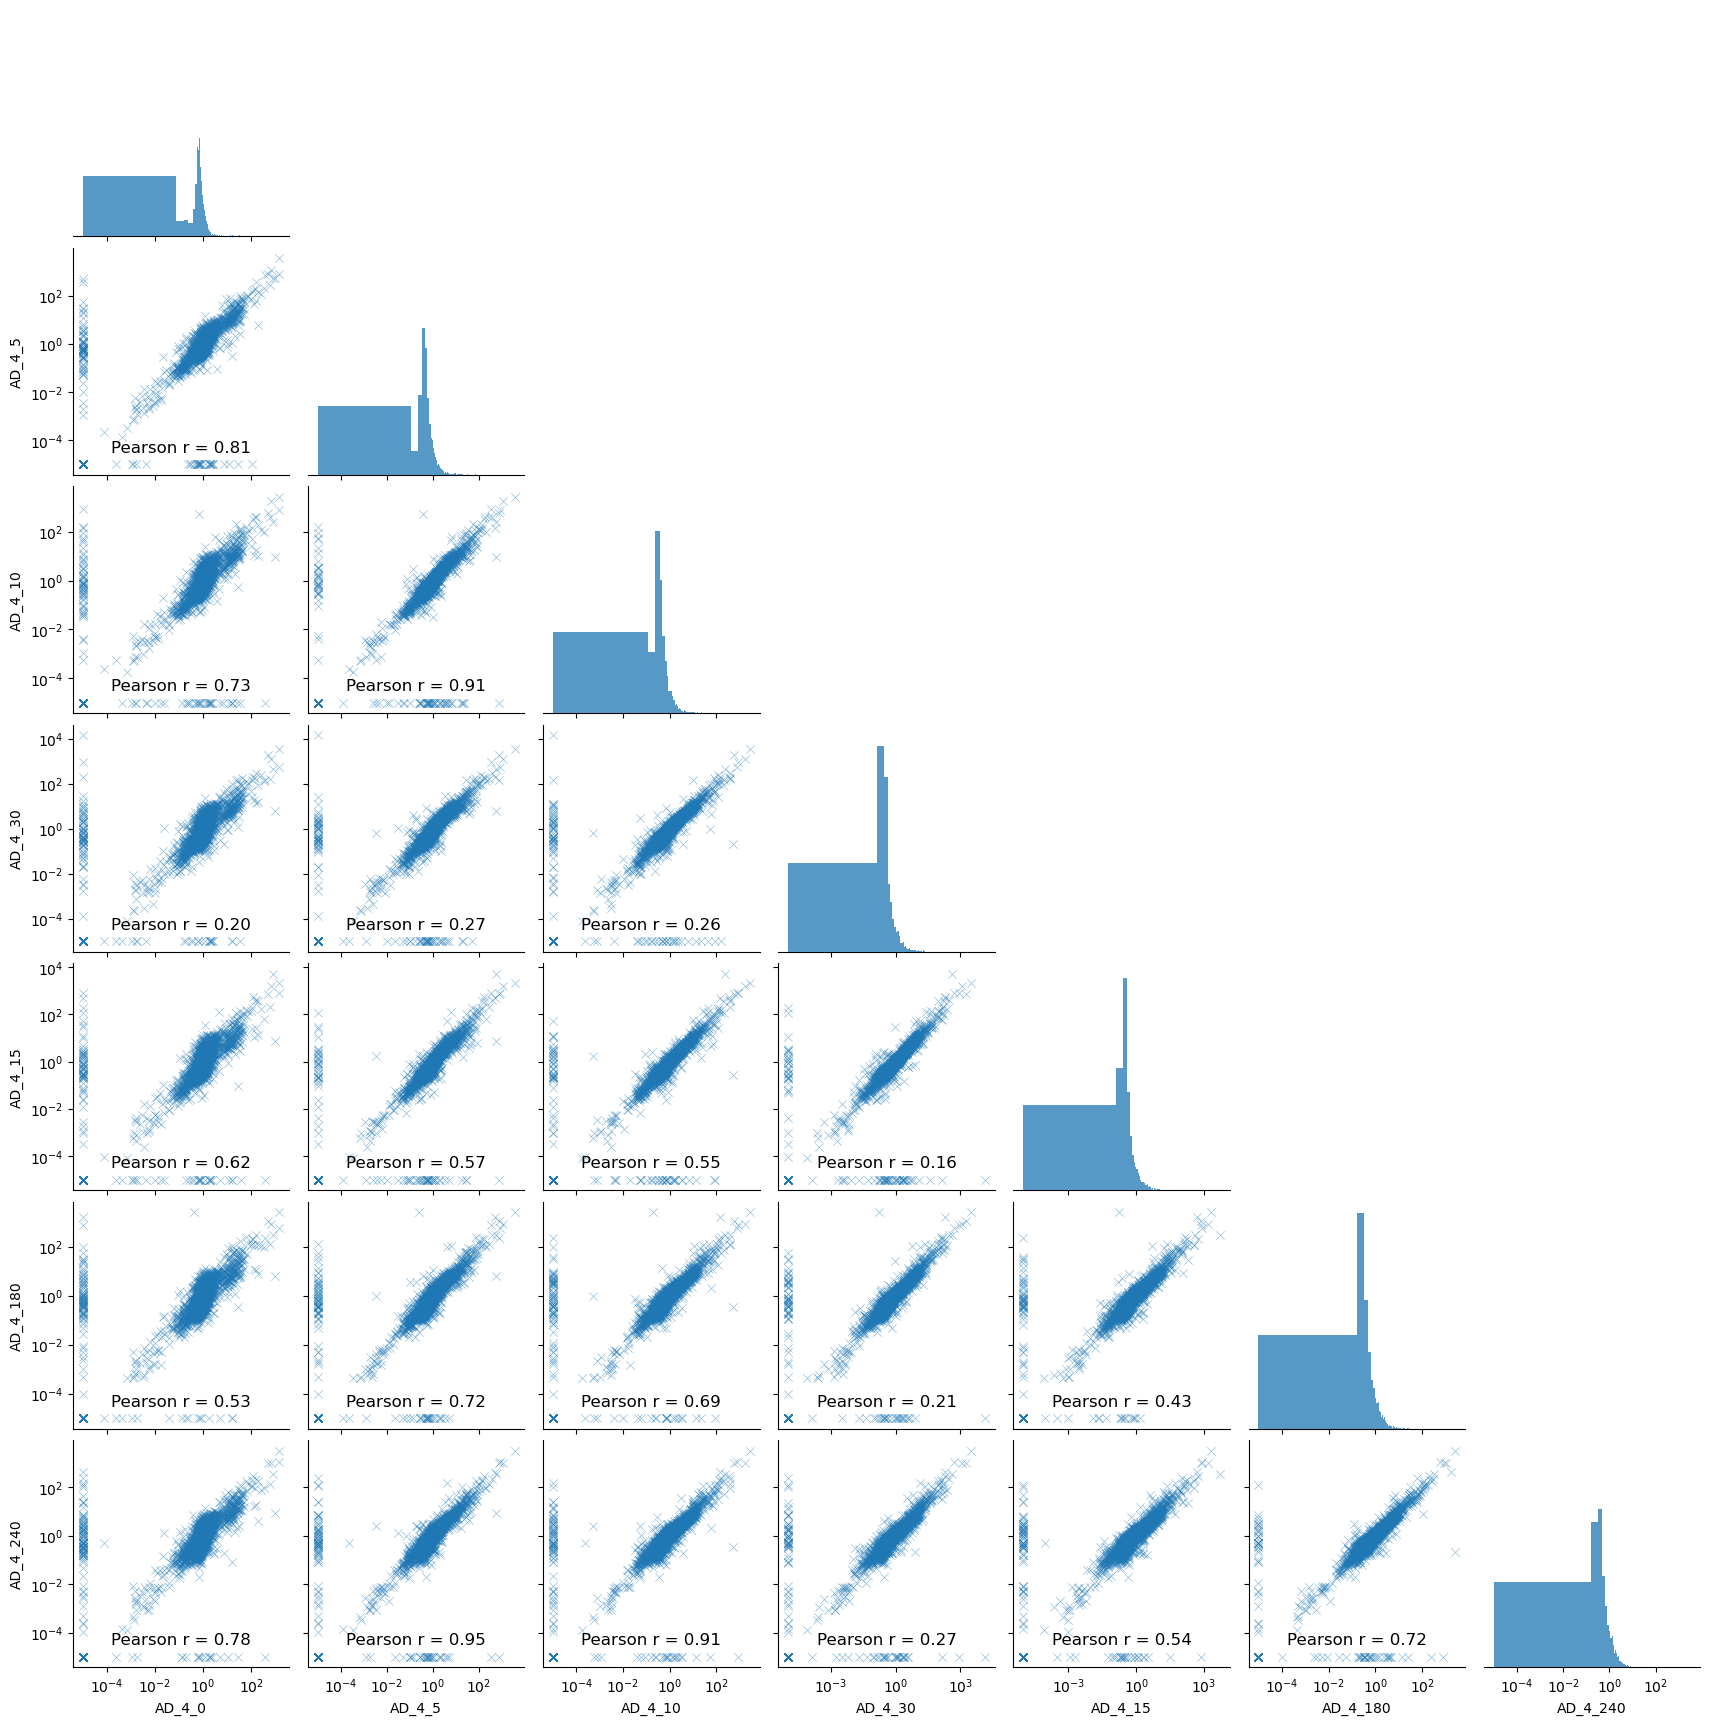

In [48]:
#get rptr normalized, pivot on rptr bc
s4_all_collapsed = s4_all.pivot_table(index='index_x', columns='Library', values='Ratio').reset_index()
s4_all_collapsed = pd.merge(s4_all_collapsed, s4_all[['index_x', 'Tile']].drop_duplicates(), on='index_x', how='left')
print(s4_all_collapsed.shape)
print(s4_all_collapsed[s4_all_collapsed.isna().any(axis=1)].shape)

# Specify the columns in the order you want
ordered_columns = ['AD_4_0', 'AD_4_5', 'AD_4_10', 'AD_4_30', 'AD_4_15', 'AD_4_180', 'AD_4_240']
p = sns.pairplot(s4_all_collapsed.fillna(1e-5), vars=ordered_columns, plot_kws={"marker": "x", "alpha": 0.5}, corner=True, )
p.set(xscale="log", yscale="log")
# Apply the custom annotation function to the lower triangle of the pairplot
p.map_lower(corrfunc)


# p.label(x='For time point X in sample 4: RPTR BC reads per million', title='Normalized RPTR BC counts in reads per million')
plt.show()

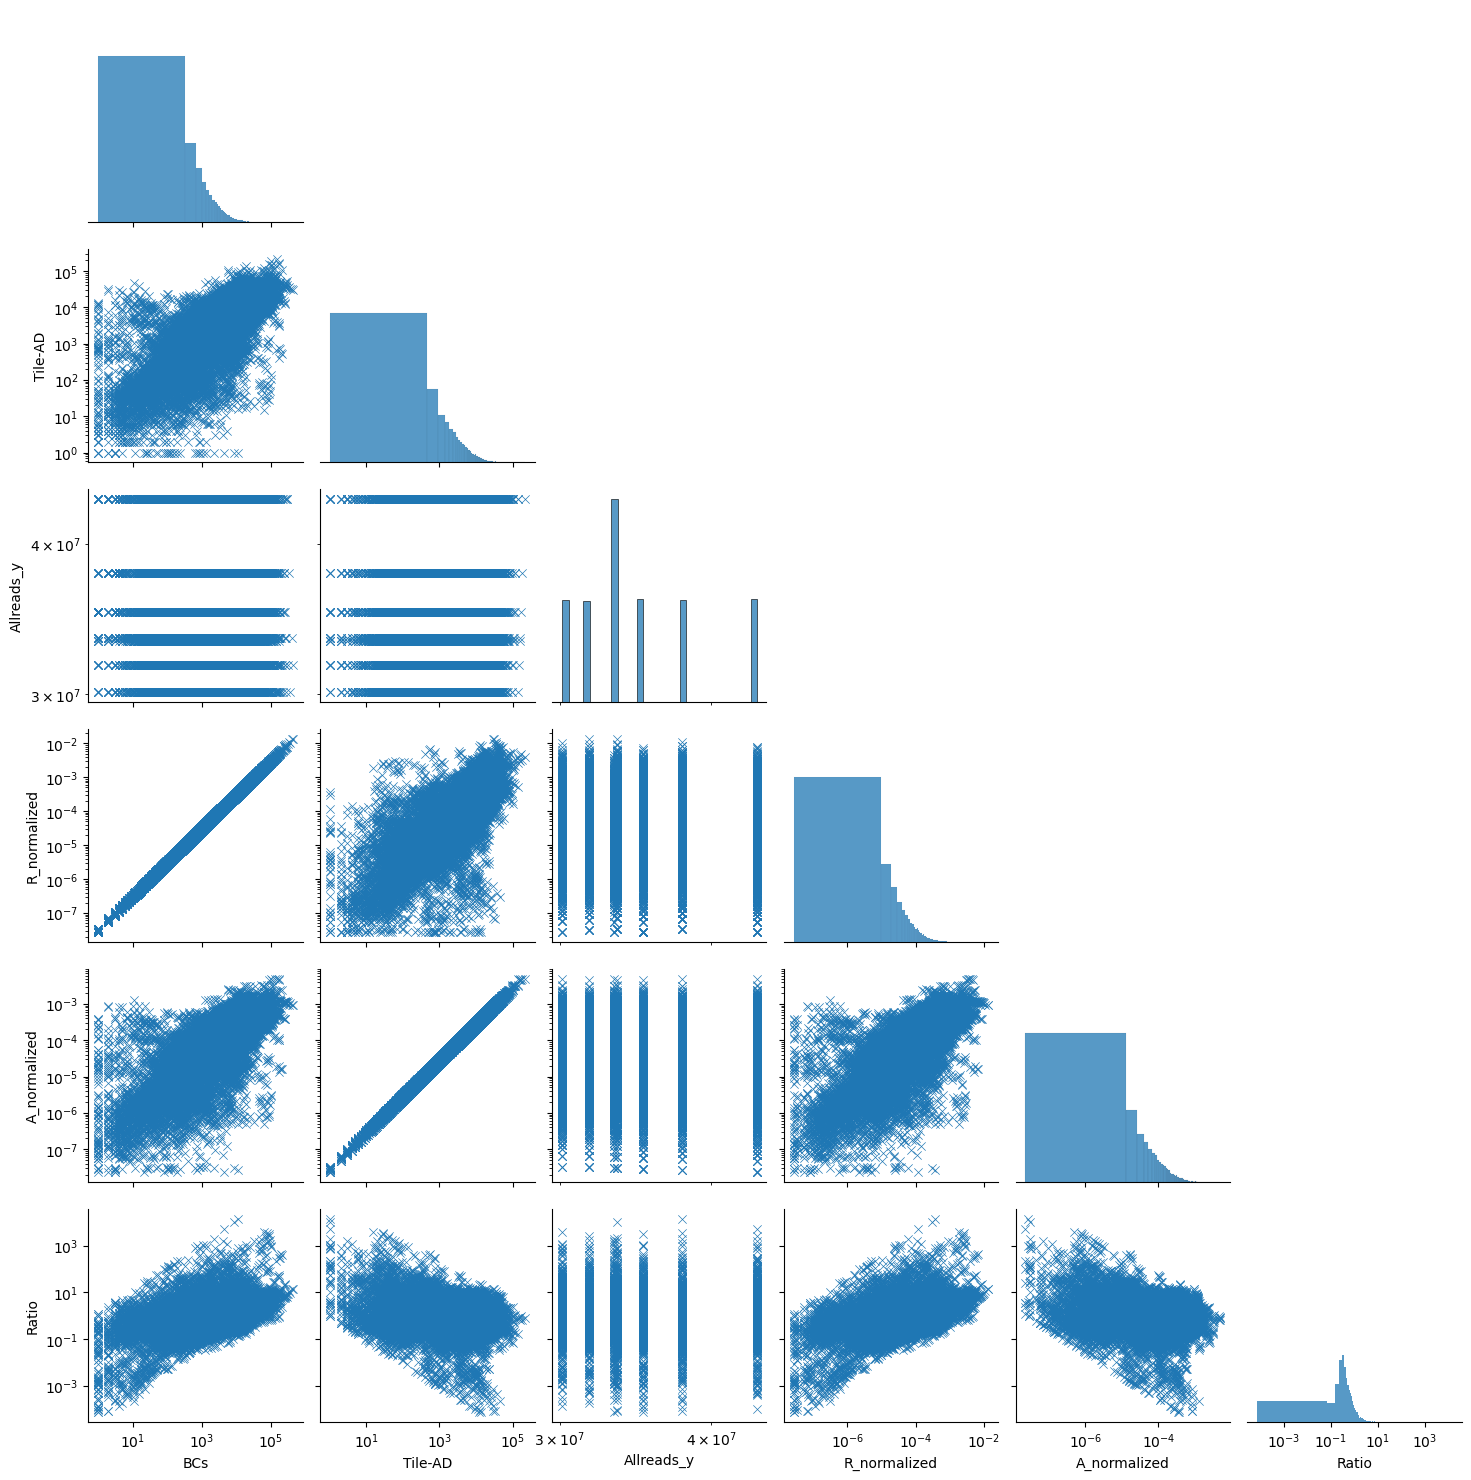

In [18]:
p = sns.pairplot(s4_all.fillna(1e-8), plot_kws={"marker": "x"}, corner=True,)
p.set(xscale="log", yscale="log")
plt.show()

AD_3_180
AD_3_10
AD_3_15
AD_3_0
AD_3_240
AD_3_5
(3344, 8)
(189, 8)


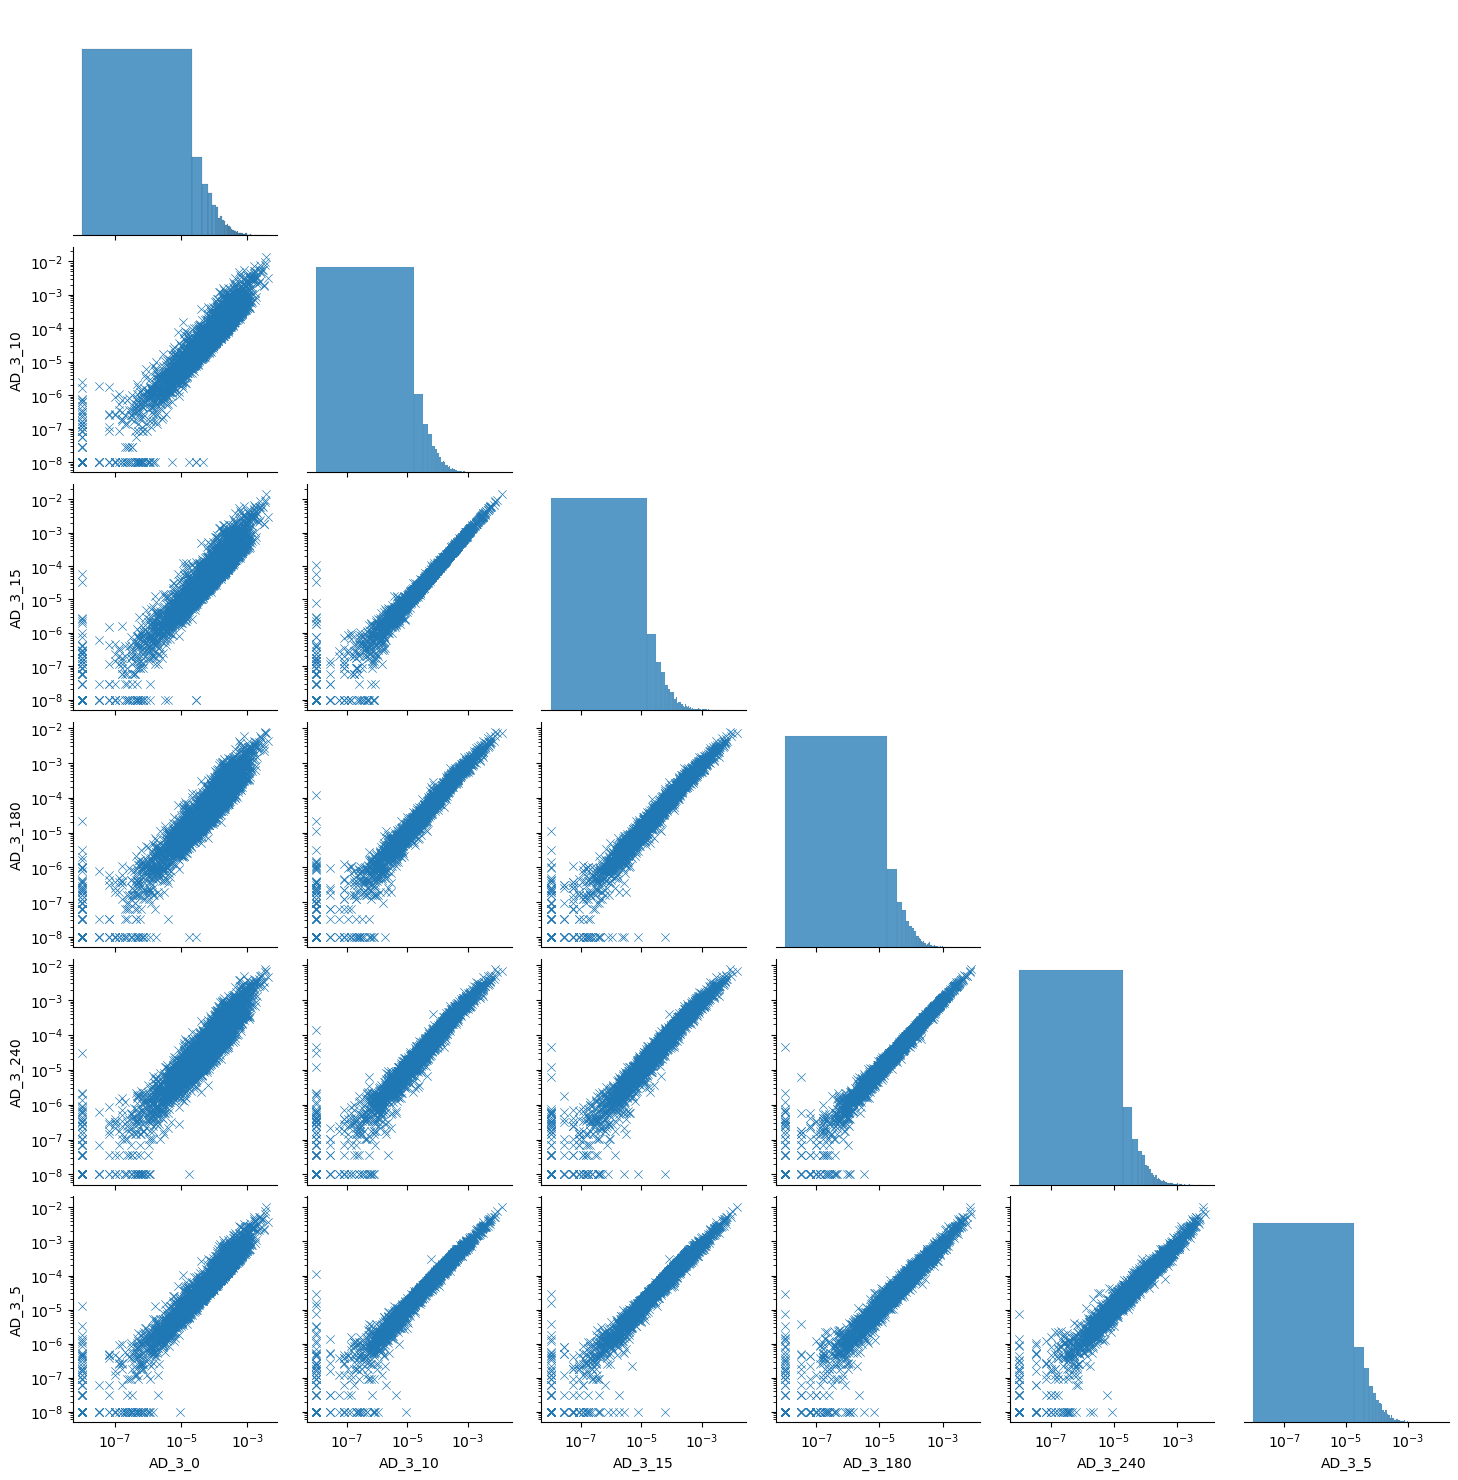

In [20]:
# sample 3
s3_timeseries = []

for key in merged_dfs.keys():
    if key.startswith('AD_3'):
        print(key)
        merged_dfs[key]['Library'] = key
        s3_timeseries.append(merged_dfs[key])
    
s3_all = pd.concat(s3_timeseries, ignore_index=True)

#get rptr normalized, pivot on rptr bc
s3_all_collapsed = s3_all.pivot_table(index='index_x', columns='Library', values='R_normalized').reset_index()
s3_all_collapsed = pd.merge(s3_all_collapsed, s3_all[['index_x', 'Tile']].drop_duplicates(), on='index_x', how='left')
print(s3_all_collapsed.shape)
print(s3_all_collapsed[s3_all_collapsed.isna().any(axis=1)].shape)

p = sns.pairplot(s3_all_collapsed.fillna(1e-8), plot_kws={"marker": "x"}, corner=True, )
p.set(xscale="log", yscale="log")
plt.show()

AD_2_30
AD_2_5
AD_2_10
AD_2_180
AD_2_0
(3305, 7)
(198, 7)


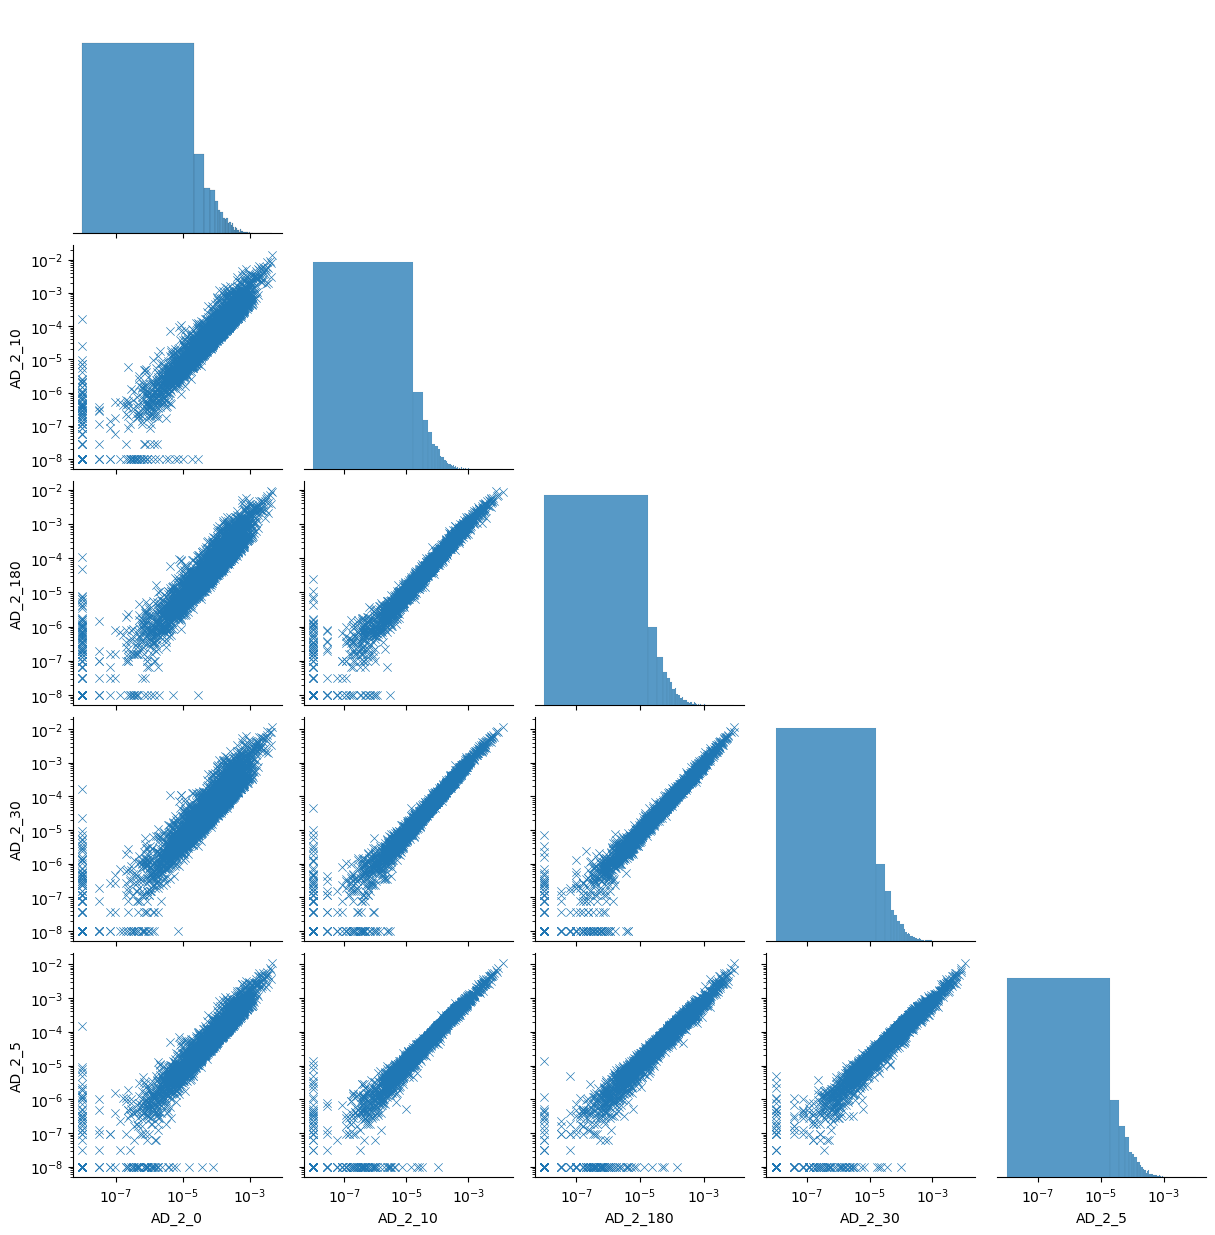

In [26]:
# sample 3
s2_timeseries = []

for key in merged_dfs.keys():
    if key.startswith('AD_2'):
        print(key)
        merged_dfs[key]['Library'] = key
        s2_timeseries.append(merged_dfs[key])
    
s2_all = pd.concat(s2_timeseries, ignore_index=True)

#get rptr normalized, pivot on rptr bc
s2_all_collapsed = s2_all.pivot_table(index='index_x', columns='Library', values='R_normalized').reset_index()
s2_all_collapsed = pd.merge(s2_all_collapsed, s2_all[['index_x', 'Tile']].drop_duplicates(), on='index_x', how='left')
print(s2_all_collapsed.shape)
print(s2_all_collapsed[s2_all_collapsed.isna().any(axis=1)].shape)

p = sns.pairplot(s2_all_collapsed.fillna(1e-8), plot_kws={"marker": "x"}, corner=True, )
p.set(xscale="log", yscale="log")
plt.show()




<Axes: >

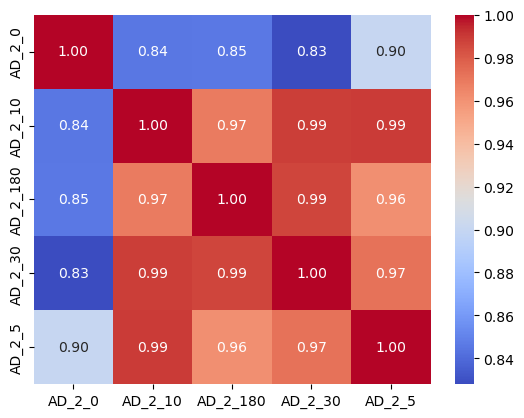

In [25]:
# Calculate the correlation matrix
corr_matrix = s2_all_collapsed.corr(numeric_only=True)

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# What if I average out the tile activities

Unfinished bc it seems like more work than is worth right now

In [38]:
merged_dfs = {}
scatter_dfs = {}

for key in ADexperiments_dict.keys():
    print(key)
    # Extracting the corresponding AD and RPTR dataframes
    ad_df = ADexperiments_dict[key]
    ad_df_size = ad_df.shape[0]
#     print(f'{key} has {ad_df_size} AD entries')
    rptr_df = RPTRexperiments_dict[key.replace("AD", "RPTR")]
    rptr_df_size = rptr_df.shape[0]
#     print(f'{key} has {rptr_df_size} RPTR entries')

    # Merging the dataframes
    merged_df = pd.merge(rptr_df, ad_df, left_on='index', right_on='PutativeRPTR', how='inner')
    # merged_df[['BCs', 'Tile-AD']]+=1 # september 4, 2024
    # merged_df_size = merged_df.shape[0]
#     print(f'{key} has {merged_df_size} merged entries')
#     print('%RPTRloss:', (1-merged_df_size/rptr_df_size) * 100)
#     print('%ADloss:', (1-merged_df_size/ad_df_size) *100)
    merged_df = merged_df.drop(['Library_x','PutativeRPTR'], axis=1)
    merged_df['R_normalized'] = merged_df['BCs'] / merged_df['Allreads_x'] #create a column that normalizes for read depth
    merged_df['A_normalized'] = merged_df['Tile-AD'] / merged_df['Allreads_y'] #create a column that normalizes for read depth
    merged_df['Ratio'] = merged_df['R_normalized'] / merged_df['A_normalized'] 
    
#     # for tiles represented by 2 RPTR BCs, take average of activity
    merged_df[['Tile', 'AD']] = merged_df['index_y'].str.split('-', expand=True) 
#     merged_df = merged_df.groupby('Tile')['Ratio'].mean(numeric_only=False).reset_index() #get means of ratios
#     merged_df = merged_df.rename(columns={'Ratio':'av_Ratio'})

    merged_df = merged_df.drop(['Allreads_x', 'index_y'], axis=1) #june 7
    # Group by 'index_x' and find the number of unique Tiles in each group
    tile_counts = merged_df.groupby('index_x')['Tile'].nunique()
    
    # Filter to find index_x values that map to more than one Tile
    multiple_tiles = tile_counts[tile_counts > 1]
    
    if not multiple_tiles.empty:
        print("Barcodes mapped to multiple tiles:")
        print(multiple_tiles)
    else:
        print("No barcodes are mapped to multiple tiles.")
    # tile_counts = merged_df.groupby('Tile')['index_x'].nunique().reset_index()
    # tile_counts.columns = ['Tile', 'Index_x_Count']
    # # Step 2: Filter tiles with only up to 2 `index_x` values
    # tiles_with_two_indexes = tile_counts[tile_counts['Index_x_Count'] == 2]['Tile']

    # # Merge the original DataFrame with the filtered tiles
    # filtered_df = merged_df[merged_df['Tile'].isin(tiles_with_two_indexes)]

    # # Create the desired DataFrame format
    # tiles = []
    # ratios_1 = []
    # ratios_2 = []

    # for tile in tiles_with_two_indexes:
    #     ratios = filtered_df[filtered_df['Tile'] == tile]['Ratio'].values
    #     if len(ratios) == 2:
    #         tiles.append(tile)
    #         ratios_1.append(ratios[0])
    #         ratios_2.append(ratios[1])

    # scatter_df = pd.DataFrame({
    #     'Tile': tiles,
    #     'Ratio_1': ratios_1,
    #     'Ratio_2': ratios_2
    # })
    # scatter_df['Library'] = key
    # scatter_dfs[key] = scatter_df
    
    # # Step 3: Create the scatterplot
    # if not scatter_df.empty:
    #     plt.figure(figsize=(10, 6))
    #     p = sns.scatterplot(data=scatter_df, x='Ratio_1', y='Ratio_2')
    #     plt.title('Scatterplot of Ratios for Tiles with exactly 2 index_x values')
    #     plt.xlabel('Ratio 1')
    #     plt.ylabel('Ratio 2')
    #     p.set(xscale="log", yscale="log")
    #     plt.show()
    
#     Storing the merged dataframe in a dictionary
    merged_dfs[key] = filtered_df


AD_3_180
No barcodes are mapped to multiple tiles.
AD_2_30
No barcodes are mapped to multiple tiles.
AD_3_10
No barcodes are mapped to multiple tiles.
AD_4_15
No barcodes are mapped to multiple tiles.
AD_3_15
No barcodes are mapped to multiple tiles.
AD_2_5
No barcodes are mapped to multiple tiles.
AD_3_0
No barcodes are mapped to multiple tiles.
AD_4_0
No barcodes are mapped to multiple tiles.
AD_4_10
No barcodes are mapped to multiple tiles.
AD_2_10
No barcodes are mapped to multiple tiles.
AD_3_240
No barcodes are mapped to multiple tiles.
AD_4_180
No barcodes are mapped to multiple tiles.
AD_4_30
No barcodes are mapped to multiple tiles.
AD_2_180
No barcodes are mapped to multiple tiles.
AD_4_5
No barcodes are mapped to multiple tiles.
AD_2_0
No barcodes are mapped to multiple tiles.
AD_4_240
No barcodes are mapped to multiple tiles.
AD_3_5
No barcodes are mapped to multiple tiles.


In [35]:
t5 = []
t10 = []
t15 = []
t30 = []
t180 = []
t240 = []

for key in merged_dfs.keys():
    if key.endswith('_5'):
        print(key)
        merged_dfs[key]['Library'] = key
        t5.append(merged_dfs[key])
    if key.endswith('_10'):
        print(key)
        merged_dfs[key]['Library'] = key
        t10.append(merged_dfs[key])
    if key.endswith('_15'):
        print(key)
        merged_dfs[key]['Library'] = key
        t15.append(merged_dfs[key])  
    if key.endswith('_30'):
        print(key)
        merged_dfs[key]['Library'] = key
        t30.append(merged_dfs[key])
    if key.endswith('_180'):
        print(key)
        merged_dfs[key]['Library'] = key
        t180.append(merged_dfs[key])
    if key.endswith('_240'):
        print(key)
        merged_dfs[key]['Library'] = key
        t240.append(merged_dfs[key])      
        
        
t5_all = pd.concat(t5, ignore_index=True)
t10_all = pd.concat(t10, ignore_index=True)
t15_all = pd.concat(t15, ignore_index=True)
t30_all = pd.concat(t30, ignore_index=True)
t180_all = pd.concat(t180, ignore_index=True)
t240_all = pd.concat(t240, ignore_index=True)

# print(t10_all.head())
# print(t10_all.tail())

AD_3_180
AD_2_30
AD_3_10
AD_4_15
AD_3_15
AD_2_5
AD_4_10
AD_2_10
AD_3_240
AD_4_180
AD_4_30
AD_2_180
AD_4_5
AD_4_240
AD_3_5


/tmp/ipykernel_1391737/4191944971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dfs[key]['Library'] = key


(520, 5)
(42, 5)


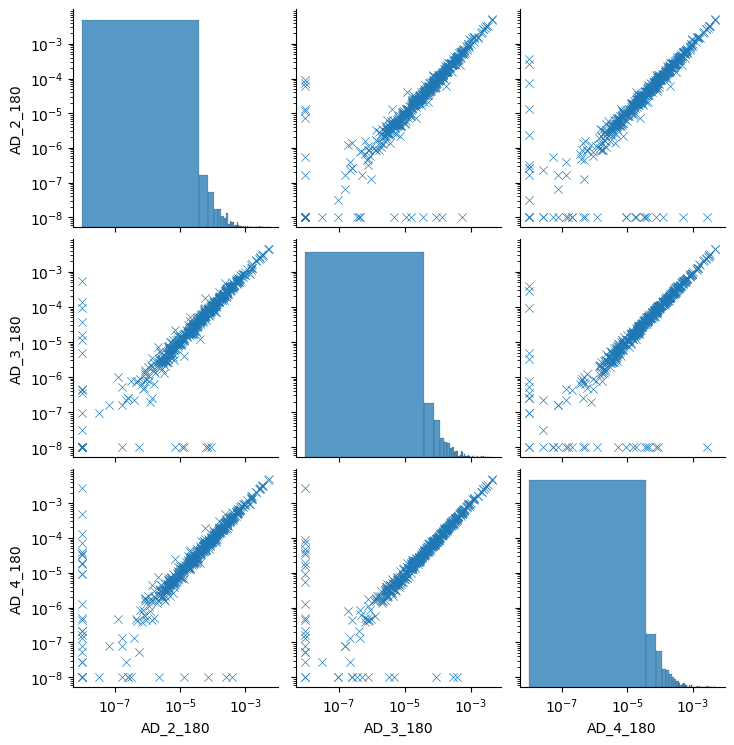

In [36]:
#get rptr normalized, pivot on rptr bc
t180_all_collapsed = t180_all.pivot_table(index='index_x', columns='Library', values='R_normalized').reset_index()
t180_all_collapsed = pd.merge(t180_all_collapsed, t180_all[['index_x', 'Tile']].drop_duplicates(), on='index_x')
print(t180_all_collapsed.shape)
print(t180_all_collapsed[t180_all_collapsed.isna().any(axis=1)].shape)

p = sns.pairplot(t180_all_collapsed.fillna(1e-8), plot_kws={"marker": "x"})
p.set(xscale="log", yscale="log")
plt.show()
# t180_all_collapsed.to_csv('t180r_norm_pseudocorrected.csv')

# Create the same pivot tables on ad abundance and ratio values 
Can call them "t\*a_norm_nans.csv" and "t\*ratio_norm_nans.csv" respectively

In [9]:
# pivot on A_normalized (later Ratio)
t5_AD = t5_all.pivot_table(index='index_x', columns='Library', values='A_normalized').reset_index()
print(t5_AD.shape)

t5_AD = pd.merge(t5_AD, t5_all[['index_x', 'Tile']].drop_duplicates(), on='index_x', how='left')
print(t5_AD.shape)


t5_AD = t5_AD[['index_x', 'Tile','AD_2_5', 'AD_3_5', 'AD_4_5']]
t5_AD[t5_AD.isna().any(axis=1)]

(3286, 4)
(3286, 5)


index_x                                               Tile  \
35    AAATGAAATGAGCA  ATTGATTCTCCATTGTATATTGCTGATTCTACTGATACTTCTCCAT...   
58    AACCTCCCCAGTGA  CCATTTATGTCTGCTCCAAATTCTACTGCTTTGACTGCTTTGACTT...   
81    AACTTCGCCGTATA  TATAATAGGAAACATAGATCTGCTCCATTGAATCCAATTGTTCCAG...   
152   AATTGCACACTTTA  ACTCCAATTGATTTGACTTCATTTACTACTGATTATCATCAACAAT...   
172   ACACCGGACTTTGT  CCACCATGGTTGCCATCTTCTTCTTCTTCTTTGCCAGCTCAATCTC...   
...              ...                                                ...   
3155  TTCTGTTTGGCAGT  GTCTTGGATTCTTCTTCATTTAGAAGGAAATCTTCTGTTACTAATT...   
3218  TTGGGGGTGGAAAA  GTTACTCATAGAAGAGGTCATAATTGTTGGCAAGGTAGAGCTTCTG...   
3251  TTTCCTCCGACGAG  GCTTCTCAATGGGAACCAGAAATGGAAAATTCTTTGAATTTGTGGG...   
3265  TTTGCCCCAGTGAT  AATTATTCTACTCAATCTGTTTCTTCTTCTACTTCTGAATCTCCAT...   
3281  TTTTGCATCAGATT  ATGAAGACATTTGATCCAGAAGTTGCATTTGAAGAATGGTTCTTGT...   

            AD_2_5        AD_3_5        AD_4_5  
35             NaN  8.590361e-08  1.660827e-07  
58             NaN  4.008835e-07  2.325158e-07  
81             NaN  5.440562e-07  7.971970e-07  
152   1.457988e-07           NaN           NaN  
172            NaN  2.577108e-07           NaN  
...            ...           ...           ...  
3155           NaN  2.863454e-08           NaN  
3218           NaN  4.295181e-07           NaN  
3251           NaN  1.746707e-06  9.300632e-07  
3265           NaN  2.863454e-08           NaN  
3281  3.644971e-07           NaN           NaN  

[146 rows x 5 columns]

In [19]:
# write a function for this so i can just put it on a loop
# Function to annotate with Pearson correlation
# def corrfunc(x, y, **kws):
#     r = np.corrcoef(x, y)[0, 1]
#     ax = plt.gca()
#     ax.annotate(f'Pearson r = {r:.2f}', xy=(0.5, 0.1), xycoords=ax.transAxes, ha='center', fontsize=12)

# Function to annotate with Spearman correlation, dropping NaNs
def corrfunc(x, y, **kws):
    # Drop NaN values from both x and y
    mask = ~np.isnan(x) & ~np.isnan(y)
    
    if np.sum(mask) == 0:
        r = 0  # If there are no valid data points left after dropping NaNs, set r to 0
    else:
        # Compute Spearman correlation with valid (non-NaN) data
        r, _ = spearmanr(x[mask], y[mask])

    # Plot annotation
    ax = plt.gca()
    ax.annotate(f'Spearman r = {r:.2f}', xy=(0.5, 0.1), xycoords=ax.transAxes, ha='center', fontsize=12)


def pivoter(alldf, piv_values, saveas=False):
    """
    takes concatenated df containing columns: index_x	BCs	PutativeTileADBC	Tile-AD	Library_y	Allreads_y	R_normalized	A_normalized	Ratio	Tile	AD	Library
    returns df where each row is a barcode and its corresponding tile and activity score for each replicate in columns
    prints a scatterplot matrix of activity scores against one another
    saves resulting df as a csv
    
    alldf : pandas_df -- concatenated df to pivot (eg t*_all)
    piv_values : {{“R_normalized”, “A_normalized”, “Ratio”}}  -- column with values to pivot on
    saveas : bool -- True to save resulting df as a csv. Will overwrite.
    """
    collapsed = alldf.pivot_table(index='index_x', columns='Library', values=piv_values).reset_index()
    collapsed = pd.merge(collapsed, alldf[['index_x', 'Tile']].drop_duplicates(), on='index_x')
    print('Barcodes represented total:', collapsed.shape[0])
    print('Barcodes represented in at least one but not all replicates:',collapsed[collapsed.isna().any(axis=1)].shape[0])
    num_cols = collapsed.select_dtypes(include='float').columns.tolist()

    # p = sns.pairplot(collapsed.fillna(1e-5), plot_kws={"marker": "x", "alpha": 0.5})
    p = sns.pairplot(collapsed.dropna(), plot_kws={"marker": "x", "alpha": 0.5})
    p.set(xscale="log", yscale="log")
    p.map_lower(corrfunc)
    plt.show()

    if saveas :
        name_time = num_cols[0].split('_')[2]
        name_type = piv_values.split('_')[0].lower()
        print(f"Saved to: t{name_time}{name_type}_norm_nans.csv'")
        collapsed.to_csv(f't{name_time}{name_type}_norm_nans.csv')

    return collapsed


Barcodes represented total: 3286
Barcodes represented in at least one but not all replicates: 146


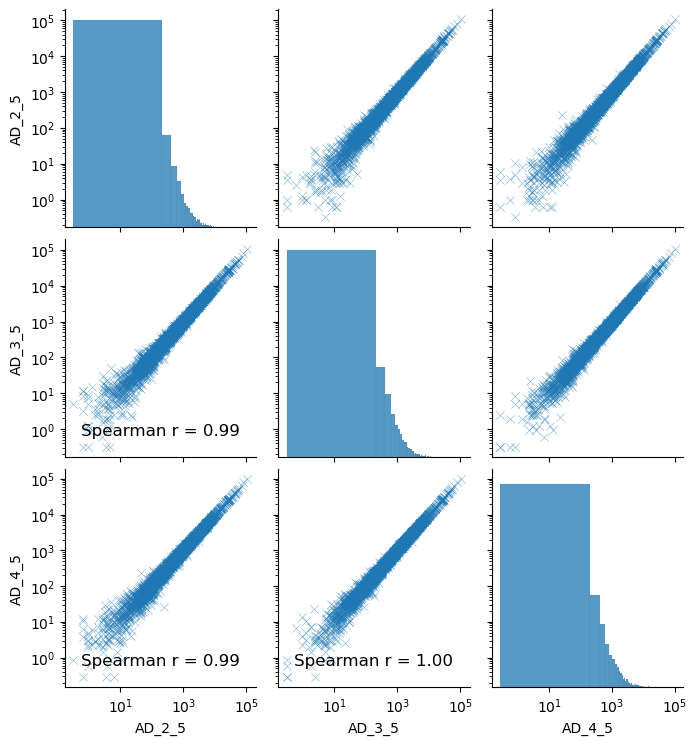

index_x       AD_2_5       AD_3_5       AD_4_5  \
0     AAAAAACCCAAACC   890.015937   738.098954   914.398676   
1     AAAAGTTCCGGCAG   140.512025   136.316971   131.557978   
2     AAAATCACAGCTAC   753.336059   725.367756   881.579911   
3     AAACAAATAGATGA  2055.307704  2015.565970  1938.287539   
4     AAACAAGTTCTGCG   232.483532   282.881004   295.934720   
...              ...          ...          ...          ...   
3281  TTTTGCATCAGATT    48.859863          NaN          NaN   
3282  TTTTGGGATCCTAC   810.179560   785.918575   738.705118   
3283  TTTTGTACTAGCGA   289.327032   296.854270   233.975156   
3284  TTTTGTCAAAATTT   202.465054   191.899518   171.732672   
3285  TTTTTGCTCGCCTG   338.506241   375.725593   351.104194   

                                                   Tile  
0     GATTTGTTGATTCAAGATCCATATATGTCTGCTCCAAATTCTACTG...  
1     ACTCCAGTTATTCCAGAATCTGATGATCCAGCTTCTTTGAAGAGAG...  
2     TCTGATGAAACTATTTCTGCTGCTACTACTTCTGCTTCTTCTCCAG...  
3     GGTACTTATATTCATCATGAAATTTCTGGTTGTGATTCTCATAAAG...  
4     TTGTCTCCAGACTTCTTGTTGTCTTTGGCTGCTCAACAGAAACAAA...  
...                                                 ...  
3281  ATGAAGACATTTGATCCAGAAGTTGCATTTGAAGAATGGTTCTTGT...  
3282  ACTCCAAATCCATCTTCTACTTTGCCAACTCCAATGTTGGATGCTA...  
3283  ACTATTTATGATCCACAAATGAATTTGTCTTCTTCTTCTTCTACTA...  
3284  GGTACTAGAAGAAGATCTGGTACTAATTCTTCTCCACCATCTGGTT...  
3285  GGTGCTTCTTTGATGCCAGCATTTCAAGCTGGTGGATTCTCTTTGG...  

[3286 rows x 5 columns]

In [20]:
pivoter(t5_all, 'R_norm_rpm', )

Barcodes represented total: 3286
Barcodes represented in at least one but not all replicates: 146


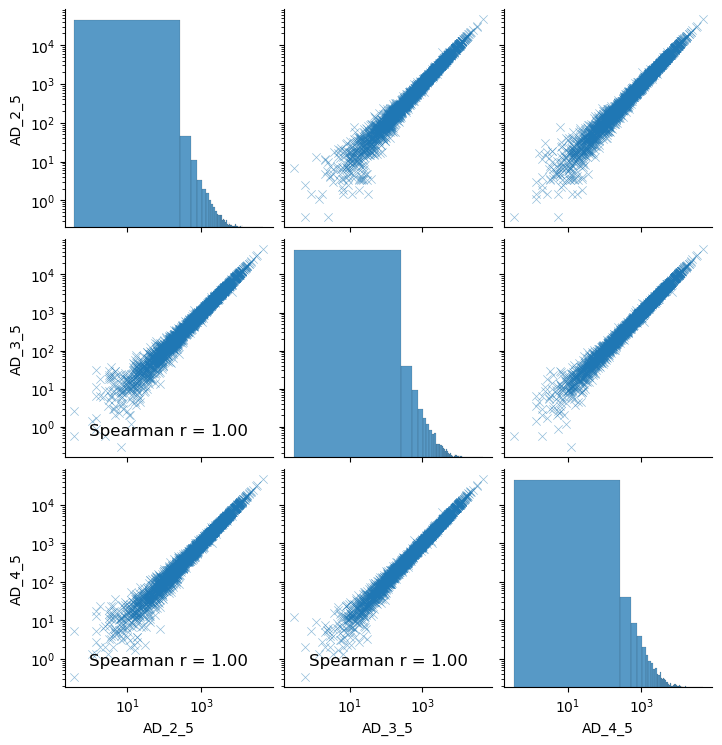

index_x       AD_2_5       AD_3_5       AD_4_5  \
0     AAAAAACCCAAACC   992.525514   730.180705   888.542522   
1     AAAAGTTCCGGCAG    11.299409    10.881124    12.290121   
2     AAAATCACAGCTAC   858.026096   877.362228   934.713516   
3     AAACAAATAGATGA    17.860356    10.881124    13.950948   
4     AAACAAGTTCTGCG   961.543263   967.274675   896.182326   
...              ...          ...          ...          ...   
3281  TTTTGCATCAGATT     3.644971          NaN          NaN   
3282  TTTTGGGATCCTAC  2257.330337  2345.741308  2227.501364   
3283  TTTTGTACTAGCGA   295.607121   231.939753   246.798913   
3284  TTTTGTCAAAATTT   359.394108   396.301998   523.492715   
3285  TTTTTGCTCGCCTG   612.355073   770.269058   722.791973   

                                                   Tile  
0     GATTTGTTGATTCAAGATCCATATATGTCTGCTCCAAATTCTACTG...  
1     ACTCCAGTTATTCCAGAATCTGATGATCCAGCTTCTTTGAAGAGAG...  
2     TCTGATGAAACTATTTCTGCTGCTACTACTTCTGCTTCTTCTCCAG...  
3     GGTACTTATATTCATCATGAAATTTCTGGTTGTGATTCTCATAAAG...  
4     TTGTCTCCAGACTTCTTGTTGTCTTTGGCTGCTCAACAGAAACAAA...  
...                                                 ...  
3281  ATGAAGACATTTGATCCAGAAGTTGCATTTGAAGAATGGTTCTTGT...  
3282  ACTCCAAATCCATCTTCTACTTTGCCAACTCCAATGTTGGATGCTA...  
3283  ACTATTTATGATCCACAAATGAATTTGTCTTCTTCTTCTTCTACTA...  
3284  GGTACTAGAAGAAGATCTGGTACTAATTCTTCTCCACCATCTGGTT...  
3285  GGTGCTTCTTTGATGCCAGCATTTCAAGCTGGTGGATTCTCTTTGG...  

[3286 rows x 5 columns]

In [21]:
pivoter(t5_all, 'A_norm_rpm', )

Barcodes represented total: 3286
Barcodes represented in at least one but not all replicates: 146


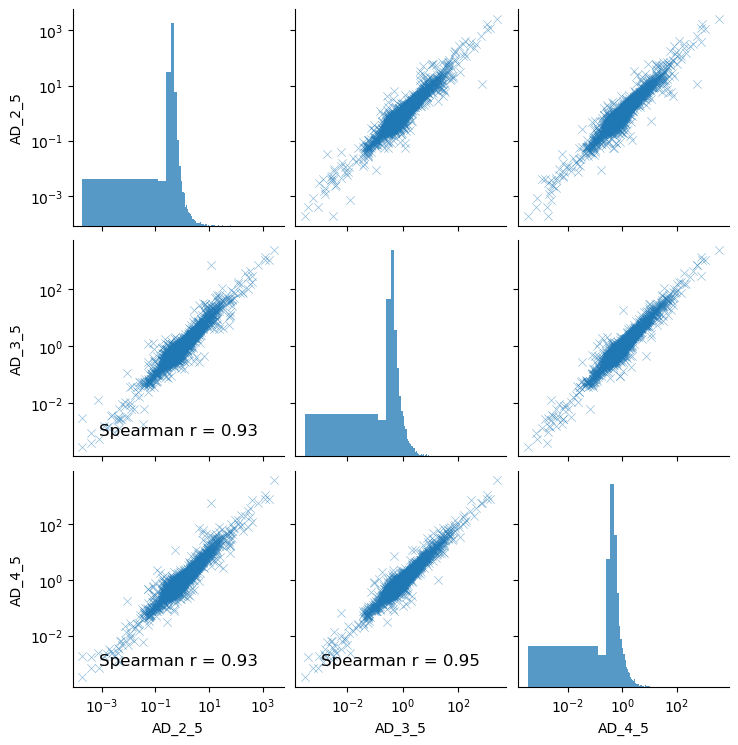

index_x      AD_2_5      AD_3_5      AD_4_5  \
0     AAAAAACCCAAACC    0.896718    1.010844    1.029100   
1     AAAAGTTCCGGCAG   12.435343   12.527839   10.704368   
2     AAAATCACAGCTAC    0.877987    0.826760    0.943155   
3     AAACAAATAGATGA  115.076523  185.235085  138.935902   
4     AAACAAGTTCTGCG    0.241782    0.292452    0.330217   
...              ...         ...         ...         ...   
3281  TTTTGCATCAGATT   13.404734         NaN         NaN   
3282  TTTTGGGATCCTAC    0.358910    0.335041    0.331629   
3283  TTTTGTACTAGCGA    0.978755    1.279877    0.948040   
3284  TTTTGTCAAAATTT    0.563351    0.484225    0.328052   
3285  TTTTTGCTCGCCTG    0.552794    0.487785    0.485761   

                                                   Tile  
0     GATTTGTTGATTCAAGATCCATATATGTCTGCTCCAAATTCTACTG...  
1     ACTCCAGTTATTCCAGAATCTGATGATCCAGCTTCTTTGAAGAGAG...  
2     TCTGATGAAACTATTTCTGCTGCTACTACTTCTGCTTCTTCTCCAG...  
3     GGTACTTATATTCATCATGAAATTTCTGGTTGTGATTCTCATAAAG...  
4     TTGTCTCCAGACTTCTTGTTGTCTTTGGCTGCTCAACAGAAACAAA...  
...                                                 ...  
3281  ATGAAGACATTTGATCCAGAAGTTGCATTTGAAGAATGGTTCTTGT...  
3282  ACTCCAAATCCATCTTCTACTTTGCCAACTCCAATGTTGGATGCTA...  
3283  ACTATTTATGATCCACAAATGAATTTGTCTTCTTCTTCTTCTACTA...  
3284  GGTACTAGAAGAAGATCTGGTACTAATTCTTCTCCACCATCTGGTT...  
3285  GGTGCTTCTTTGATGCCAGCATTTCAAGCTGGTGGATTCTCTTTGG...  

[3286 rows x 5 columns]

In [22]:
pivoter(t5_all, 'Ratio')

AD ABUNDANCE
Barcodes represented total: 3286
Barcodes represented in at least one but not all replicates: 146


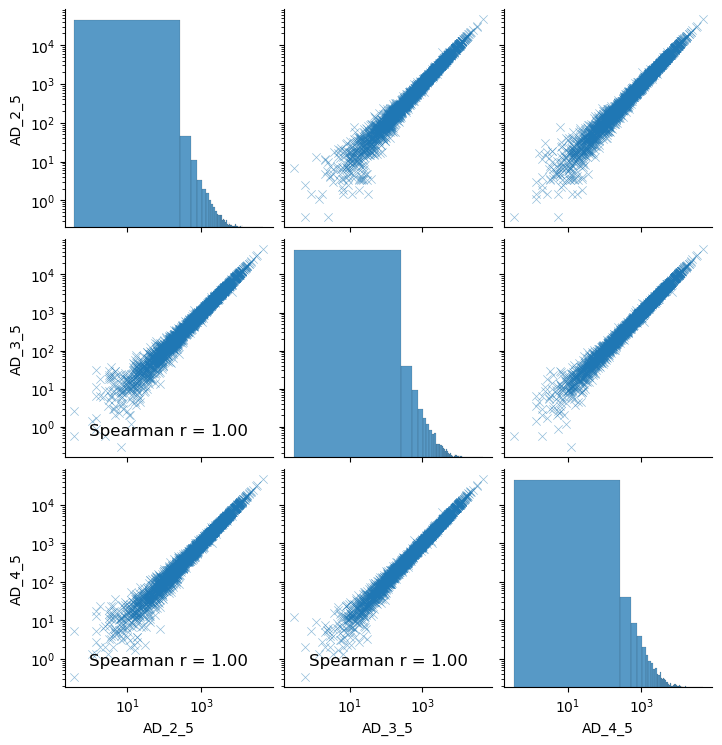

RPTR ABUNDANCE
Barcodes represented total: 3286
Barcodes represented in at least one but not all replicates: 146


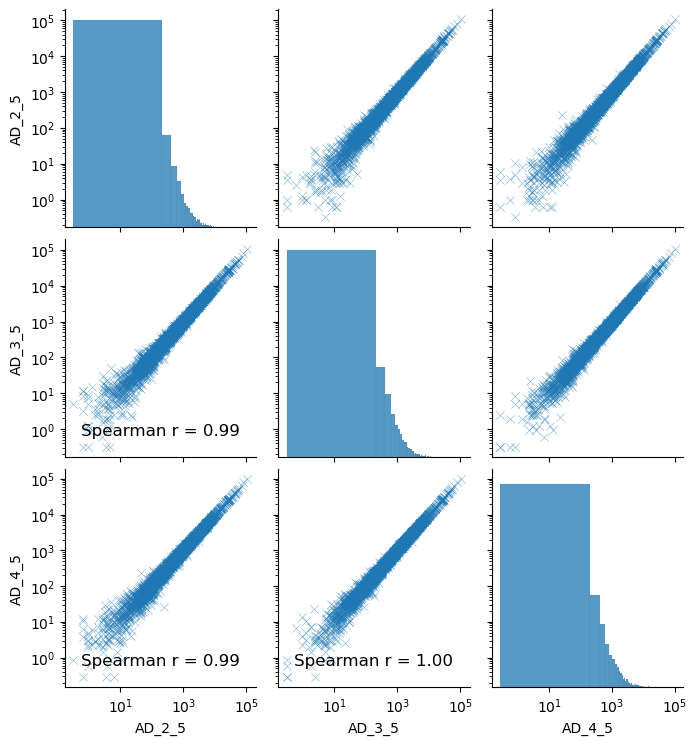

AD ABUNDANCE
Barcodes represented total: 3280
Barcodes represented in at least one but not all replicates: 121


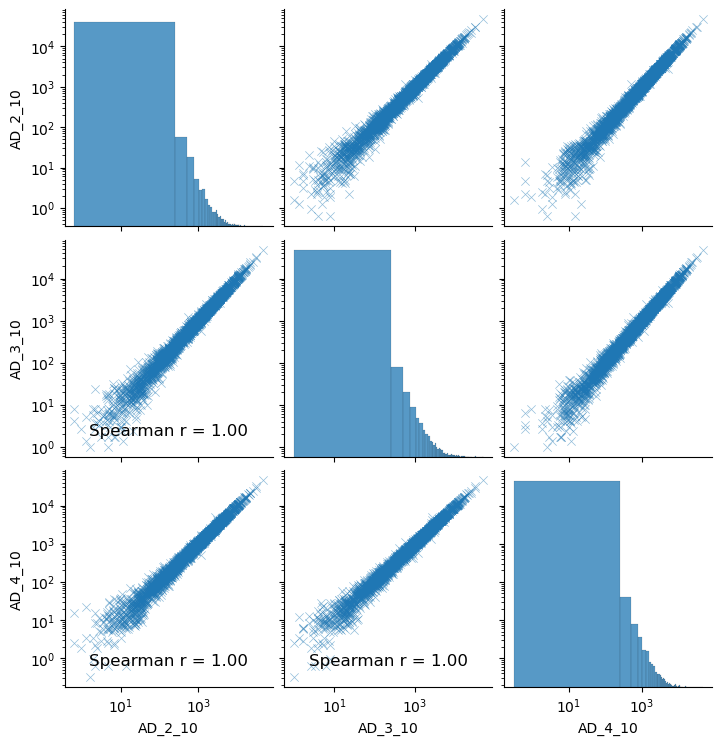

RPTR ABUNDANCE
Barcodes represented total: 3280
Barcodes represented in at least one but not all replicates: 121


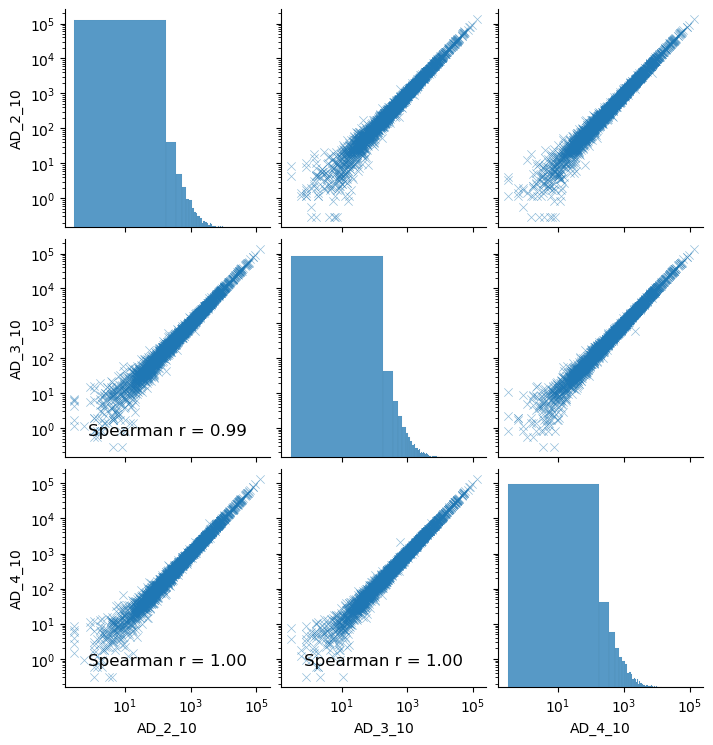

AD ABUNDANCE
Barcodes represented total: 3278
Barcodes represented in at least one but not all replicates: 75


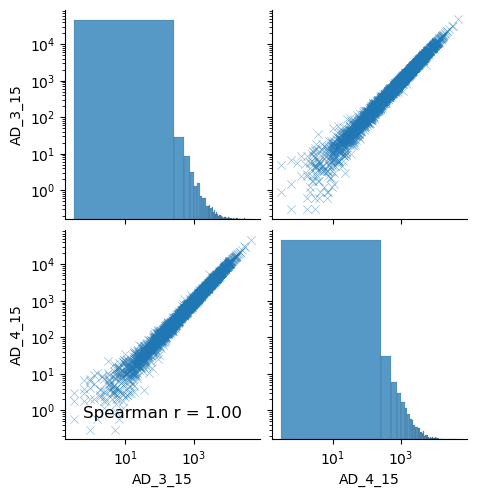

RPTR ABUNDANCE
Barcodes represented total: 3278
Barcodes represented in at least one but not all replicates: 75


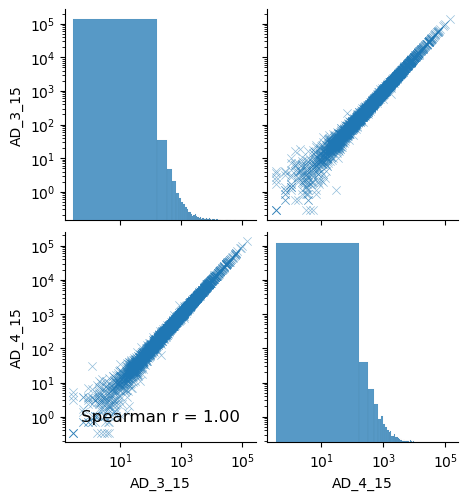

AD ABUNDANCE
Barcodes represented total: 3280
Barcodes represented in at least one but not all replicates: 92


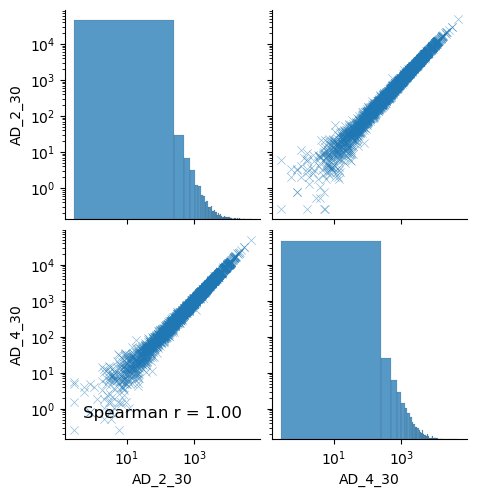

RPTR ABUNDANCE
Barcodes represented total: 3280
Barcodes represented in at least one but not all replicates: 92


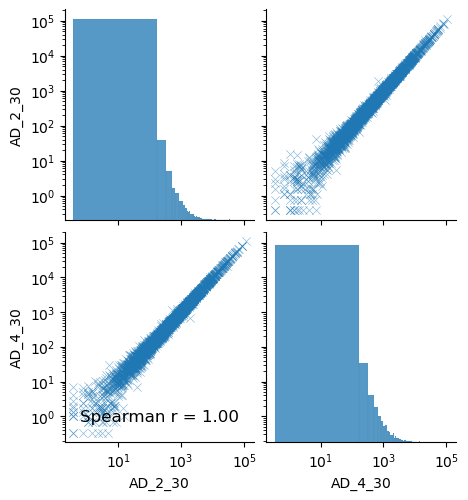

AD ABUNDANCE
Barcodes represented total: 3319
Barcodes represented in at least one but not all replicates: 124


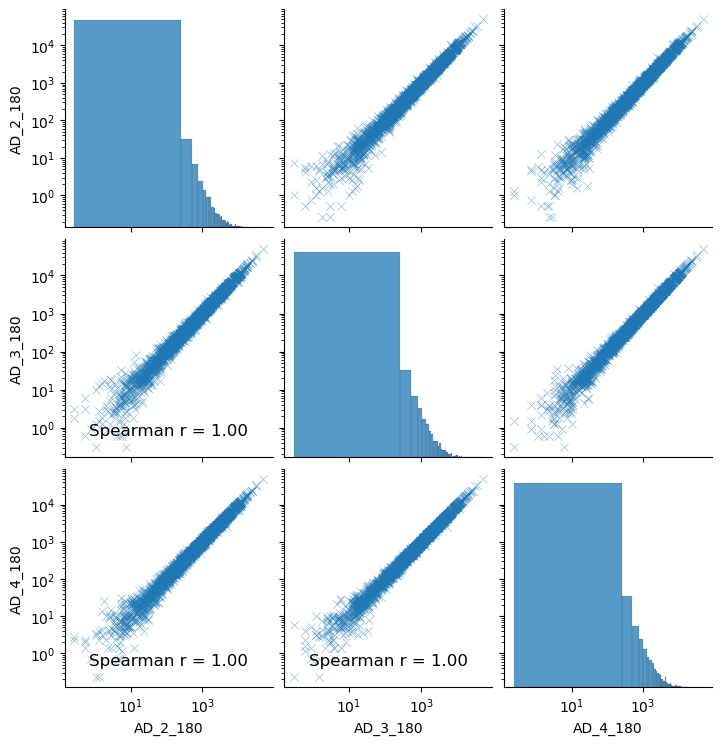

RPTR ABUNDANCE
Barcodes represented total: 3319
Barcodes represented in at least one but not all replicates: 124


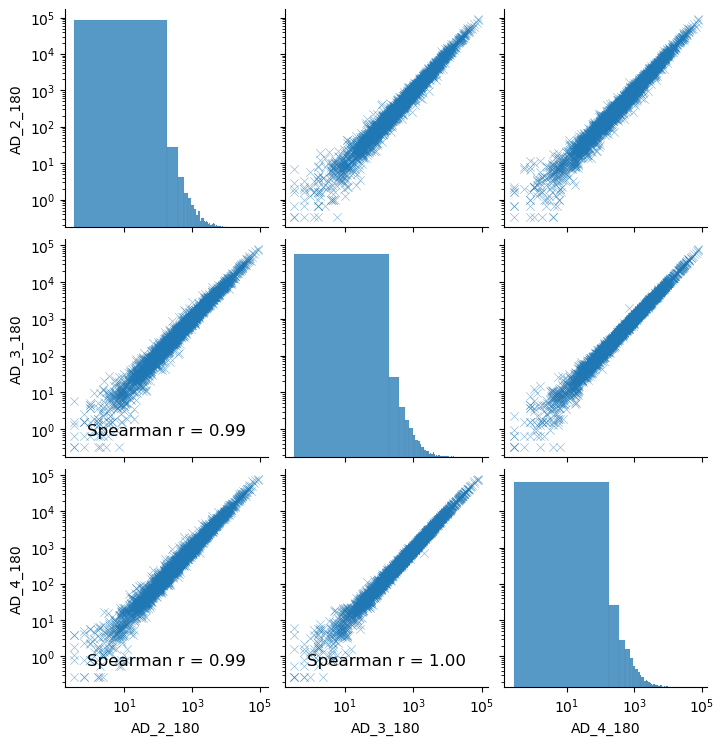

AD ABUNDANCE
Barcodes represented total: 3309
Barcodes represented in at least one but not all replicates: 96


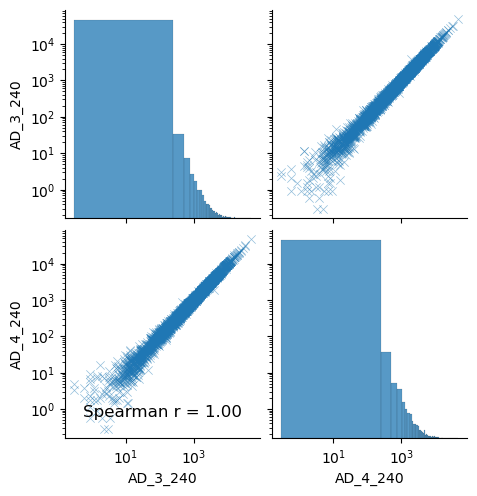

RPTR ABUNDANCE
Barcodes represented total: 3309
Barcodes represented in at least one but not all replicates: 96


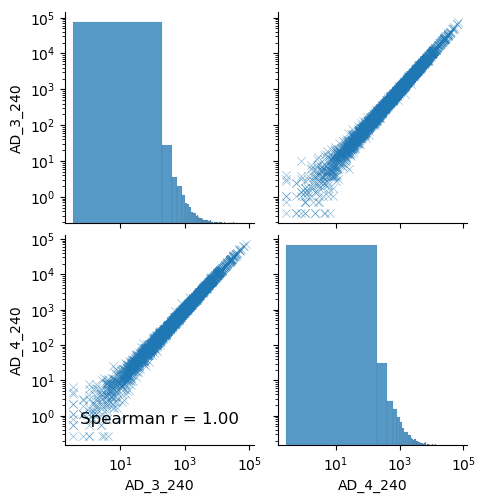

In [23]:
dfs_toprocess = [t5_all, t10_all, t15_all, t30_all, t180_all, t240_all]

for d in dfs_toprocess:
    print('AD ABUNDANCE')
    pivoter(d, 'A_norm_rpm', )
    print('RPTR ABUNDANCE')
    pivoter(d, 'R_norm_rpm', )

RATIO
Barcodes represented total: 3286
Barcodes represented in at least one but not all replicates: 146


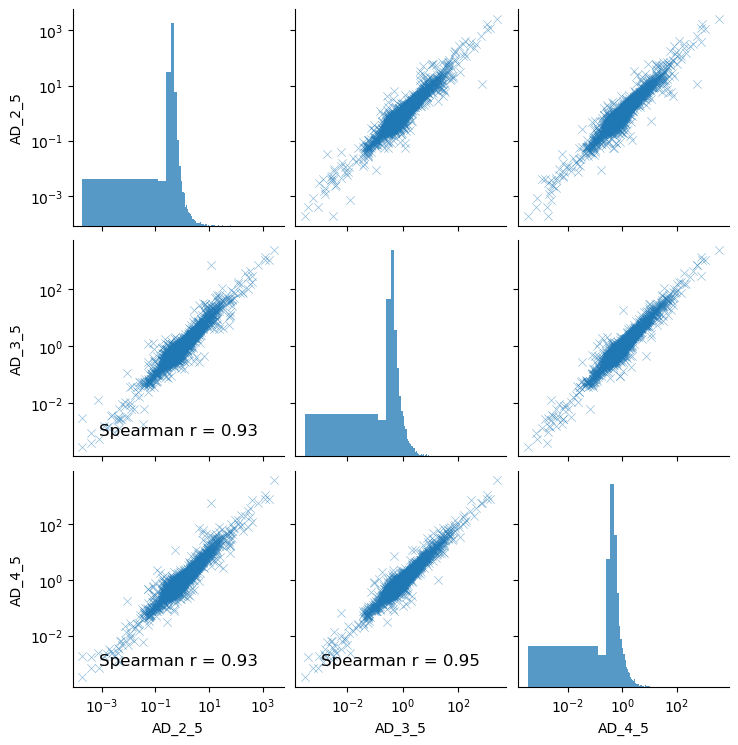

RATIO
Barcodes represented total: 3280
Barcodes represented in at least one but not all replicates: 121


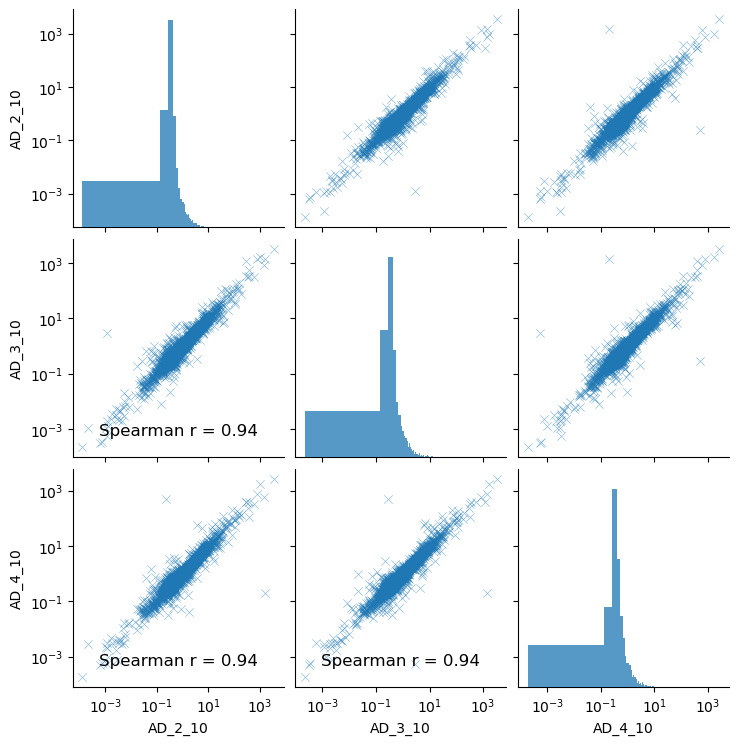

RATIO
Barcodes represented total: 3278
Barcodes represented in at least one but not all replicates: 75


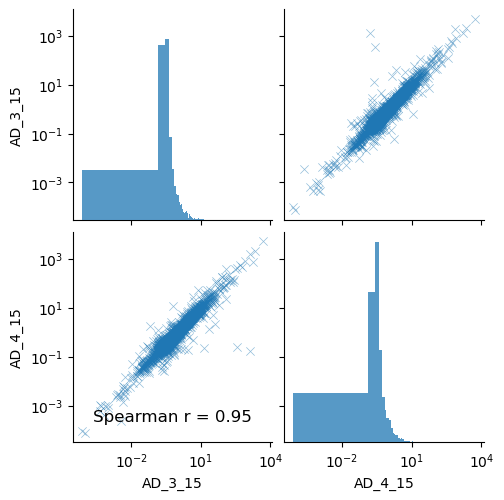

RATIO
Barcodes represented total: 3280
Barcodes represented in at least one but not all replicates: 92


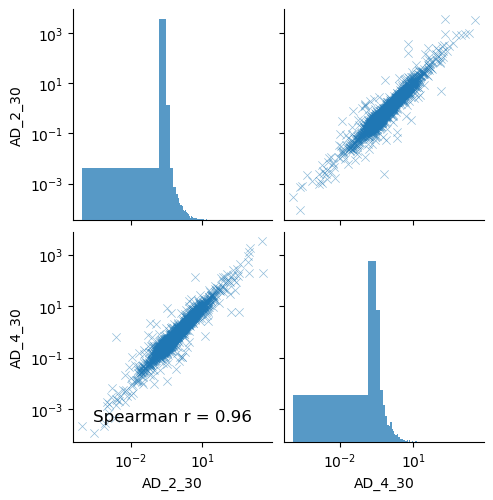

RATIO
Barcodes represented total: 3319
Barcodes represented in at least one but not all replicates: 124


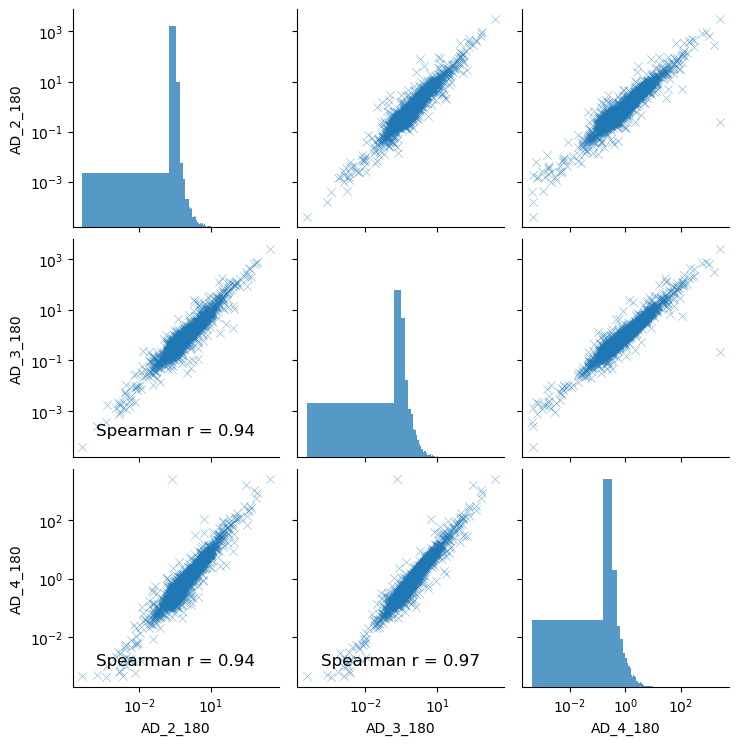

RATIO
Barcodes represented total: 3309
Barcodes represented in at least one but not all replicates: 96


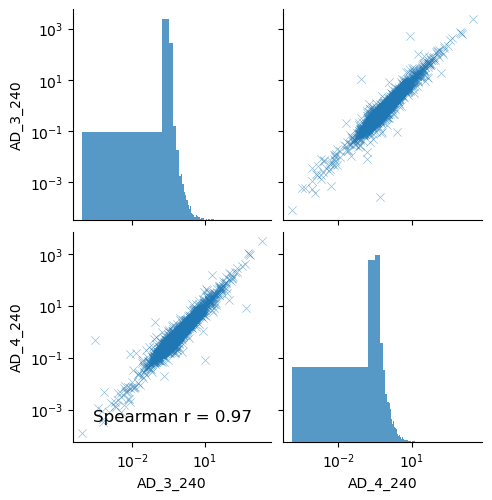

In [24]:
dfs_toprocess = [t5_all, t10_all, t15_all, t30_all, t180_all, t240_all]

for d in dfs_toprocess:
    print('RATIO')
    pivoter(d, 'Ratio', )


In [30]:
print(t10_all)

             index_x     BCs  \
0     GCTTCTCCGCACAT  478213   
1     GTCCAGTTTAGTGA  330404   
2     TAGGAATTAGATCT  283068   
3     TGGGCCGGAATTGC  278184   
4     TCAGCATCCAACAC  250123   
...              ...     ...   
9659  TCAAGAGTATTTCG       1   
9660  TAGAGGTCACTGAC       1   
9661  CCGCCAAACCATAT       1   
9662  CTATAATAAACTCC       1   
9663  CAAGACAAGGCCGC       1   

                                       PutativeTileADBC  Tile-AD Library_y  \
0     ['ACTACTCATTTGACTTCTCCATTGTCATTCTTTGATTCTCCAAA...    27740   AD_3_10   
1     ['ACTTCTCCAGATATTGATGCTTCTCCATTCTTGAATGAATCATT...    33448   AD_3_10   
2     ['GTTTCTATCTTTGATGAGAAATTGGATTCTTCTACTTGGACTTC...    12432   AD_3_10   
3     ['GCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGTT...    34442   AD_3_10   
4     ['AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGA...      385   AD_3_10   
...                                                 ...      ...       ...   
9659  ['ACTAATGCTTCTATTACTAAACCAAGAAGAAGGAAAGGTCCATT...       34   AD

/tmp/ipykernel_2685687/1332700087.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


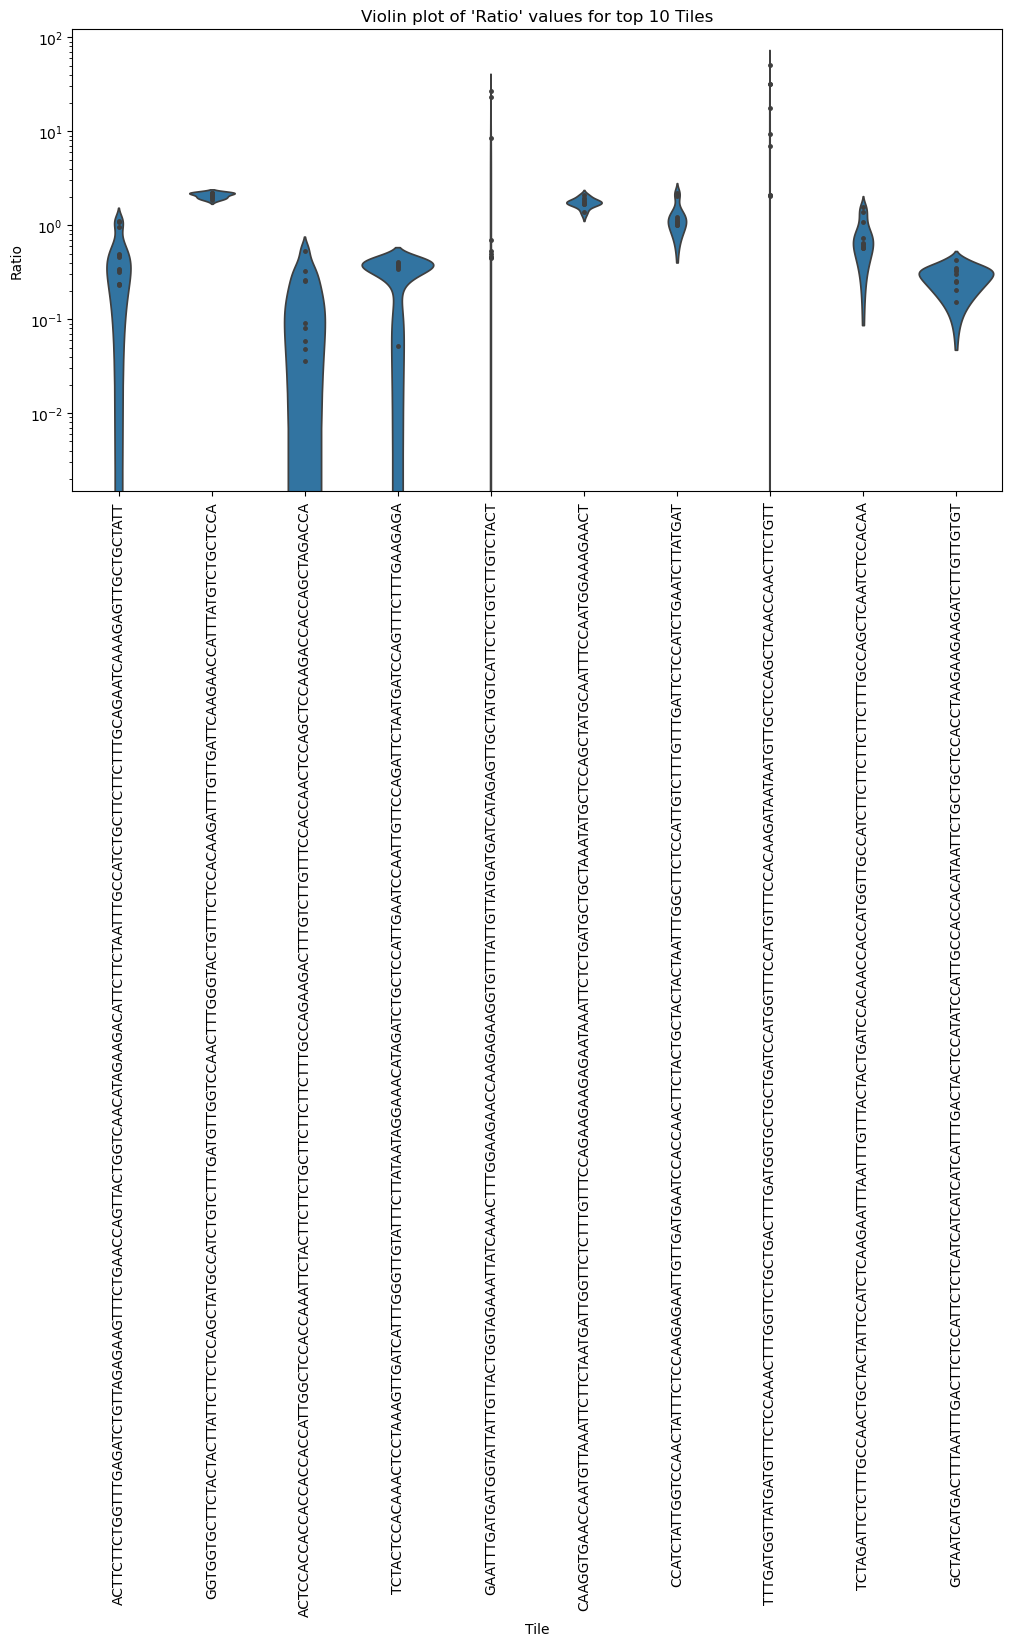

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Find the top 10 tiles with the most unique index_x barcodes
top_tiles = t10_all.groupby('Tile')['index_x'].nunique().reset_index()
top_tiles_sorted = top_tiles.sort_values('index_x', ascending=False)
top_10_tiles = top_tiles_sorted.head(10)['Tile']

# Step 2: Filter the original dataframe to include only the top 10 tiles
df_filtered = t10_all[t10_all['Tile'].isin(top_10_tiles)]

# Step 3: Generate the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Tile', y='Ratio', data=df_filtered, order=top_10_tiles,inner="point",)
# Set the y-axis to a log scale
plt.yscale('log')
# Customize plot
plt.xticks(rotation=90)
plt.title("Violin plot of 'Ratio' values for top 10 Tiles")
plt.xlabel("Tile")
plt.ylabel("Ratio")

# Show the plot
plt.tight_layout()
plt.show()


In [40]:
df_filtered[df_filtered['Ratio']>10]

index_x    BCs  \
434   CAGACACGGCTTTG  10679   
2596  CTCGGCTTAAAGAA    252   
3650  CAGACACGGCTTTG   9941   
5960  TCAAAACAAGACCA    168   
6953  CAGACACGGCTTTG   9019   
9126  TCAAAACAAGACCA    208   

                                       PutativeTileADBC  Tile-AD Library_y  \
434   ['TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTT...      178   AD_3_10   
2596  ['TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTT...       12   AD_3_10   
3650  ['TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTT...      305   AD_4_10   
5960  ['GAATTTGATGATGGTATTATTGTTACTGGTAGAAATTATCAAAC...        7   AD_4_10   
6953  ['TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTT...      254   AD_2_10   
9126  ['GAATTTGATGATGGTATTATTGTTACTGGTAGAAATTATCAAAC...        7   AD_2_10   

      Allreads_y  R_normalized  A_normalized      Ratio  \
434     29795764      0.000300  5.974004e-06  50.219657   
2596    29795764      0.000007  4.027418e-07  17.578526   
3650    31725692      0.000304  9.613659e-06  31.581475   
5960    31725692      0.000005  2.206414e-07  23.254843   
6953    32027127      0.000253  7.930777e-06  31.901190   
9126    32027127      0.000006  2.185647e-07  26.696081   

                                                   Tile           AD  Library  \
434   TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTTTG...  ATTTGGACTAT  AD_3_10   
2596  TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTTTG...  ACAAAGAATTT  AD_3_10   
3650  TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTTTG...  ATTTGGACTAT  AD_4_10   
5960  GAATTTGATGATGGTATTATTGTTACTGGTAGAAATTATCAAACTT...  AAAGACTATTC  AD_4_10   
6953  TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTTTG...  ATTTGGACTAT  AD_2_10   
9126  GAATTTGATGATGGTATTATTGTTACTGGTAGAAATTATCAAACTT...  AAAGACTATTC  AD_2_10   

       R_norm_rpm  A_norm_rpm  
434   3000.124118   59.740036  
2596    70.796074    4.027418  
3650  3036.135448   96.136595  
5960    51.309803    2.206414  
6953  2530.012232   79.307769  
9126    58.348214    2.185647

In [37]:
top_tiles_sorted.head(10)

Tile  index_x
425   ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...        4
1897  GGTGGTGCTTCTACTACTTATTCTTCTCCAGCTATGCCATCTGTCT...        3
310   ACTCCACCACCACCACCACCATTGGCTCCACCAAATTCTACTTCTT...        3
2188  TCTACTCCACAAACTCCTAAAGTTGATCATTTGGGTTGTATTTCTT...        3
1371  GAATTTGATGATGGTATTATTGTTACTGGTAGAAATTATCAAACTT...        3
877   CAAGGTGAACCAATGTTAAATTCTTCTAATGATTGGTTCTCTTTGT...        3
1170  CCATCTATTGGTCCAACTATTTCTCCAAGAGAATTGTTGATGAATC...        3
2974  TTTGATGGTTATGATGTTTCTCCAAACTTTGGTTCTGCTGACTTTG...        3
2255  TCTAGATTCTCTTTGCCAACTGCTACTATTCCATCTCAAGAATTTA...        3
1588  GCTAATCATGACTTTAATTTGACTTCTCCATTCTCTCATCATCATC...        3